In [537]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from datetime import datetime, timedelta
import requests
from io import StringIO
import time
from uuid import uuid4  # Para generar códigos únicos
import seaborn as sns
from IUCN_API.modules.Groups import Groups

In [538]:
# Descargar de cornell los nombres cientificos de las aves
url = "https://www.birds.cornell.edu/clementschecklist/wp-content/uploads/2024/10/Clements-v2024-October-2024-rev.csv"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)

if response.ok:
    lista = StringIO(response.text)
    df_tax = pd.read_csv(lista)
else:
    print("Error al descargar la taxonomía. Código HTTP:", response.status_code)

In [539]:
df_tax.columns

Index(['sort v2024', 'species_code', 'Clements v2024b change',
       'text for website v2024b', 'category', 'English name',
       'scientific name', 'range', 'order', 'family', 'extinct',
       'extinct year', 'sort_v2023'],
      dtype='object')

In [540]:
# Mostrar primeras filas de nombres comunes y científicos
df_species = df_tax[
    (df_tax['category'] == 'species') &
    df_tax[['order', 'family', 'scientific name', 'English name']].notna().all(axis=1)
][['order', 'family', 'scientific name', 'English name', 'category']]

In [541]:
df_species.columns

Index(['order', 'family', 'scientific name', 'English name', 'category'], dtype='object')

In [542]:
# Cargar todos los archivos de la red de directorios y generar un listado
base_dir = 'output/'
file_pattern = '*.BirdNET.selection.table.txt'  # Patrón de los archivos
df_list = []

# Recorrer todas las subcarpetas recursivamente
for root, _, files in os.walk(base_dir):
    for file in files:
        if file.endswith('.BirdNET.selection.table.txt'):  # Filtrar solo los archivos
            file_path = os.path.join(root, file)
            
            # Generar código único basado en rutas
            relative_path = os.path.relpath(file_path, base_dir)
            path_code = relative_path.replace(os.sep, '_')  # Ej: "quebracho_sem21_archivo.txt"
            unique_id = str(uuid4())[:8]  # Código alfanumérico corto (opcional)
            
            # Cargar archivo y añadir metadatos
            df = pd.read_csv(file_path, sep='\t')
            df['file_code'] = path_code  # Código basado en ruta
            df['unique_id'] = unique_id  # Código único universal
            df['source_path'] = relative_path  # Ruta relativa completa
            
            df_list.append(df)

# Consolidar
df_combined = pd.concat(df_list, ignore_index=True)

# Mostrar resultados
print(f"Se cargaron {len(df_list)} archivos. Total de registros: {len(df_combined)}")
print("\nEjemplo de códigos asignados:")
print(df_combined[['file_code', 'unique_id', 'source_path']].drop_duplicates().head())



Se cargaron 11351 archivos. Total de registros: 832753

Ejemplo de códigos asignados:
                                             file_code unique_id  \
0    semana19_MARTINICA_MARTINICA_20250511_124530.B...  0a5c6198   
1    semana19_MARTINICA_MARTINICA_20250511_160000.B...  2607ce39   
43   semana19_MARTINICA_MARTINICA_20250511_162000.B...  dc21f997   
67   semana19_MARTINICA_MARTINICA_20250511_164000.B...  14247c1d   
108  semana19_MARTINICA_MARTINICA_20250511_170000.B...  7d148075   

                                           source_path  
0    semana19/MARTINICA/MARTINICA_20250511_124530.B...  
1    semana19/MARTINICA/MARTINICA_20250511_160000.B...  
43   semana19/MARTINICA/MARTINICA_20250511_162000.B...  
67   semana19/MARTINICA/MARTINICA_20250511_164000.B...  
108  semana19/MARTINICA/MARTINICA_20250511_170000.B...  


In [543]:
df_combined.shape

(832753, 15)

In [544]:
df_combined.head()

Selection           View  Channel  Begin Time (s)  End Time (s)  \
0          1  Spectrogram 1        1             0.0           3.0   
1          1  Spectrogram 1        1            15.0          18.0   
2          2  Spectrogram 1        1            51.0          54.0   
3          3  Spectrogram 1        1            63.0          66.0   
4          4  Spectrogram 1        1            69.0          72.0   

   Low Freq (Hz)  High Freq (Hz)          Common Name Species Code  \
0              0           15000               nocall       nocall   
1              0           15000  Clay-colored Thrush       clcrob   
2              0           15000  Clay-colored Thrush       clcrob   
3              0           15000  Clay-colored Thrush       clcrob   
4              0           15000  Clay-colored Thrush       clcrob   

   Confidence                                         Begin Path  \
0      1.0000  input/semana19/MARTINICA/MARTINICA_20250511_12...   
1      0.4770  input/semana19/MARTINICA/MARTINICA_20250511_16...   
2      0.2978  input/semana19/MARTINICA/MARTINICA_20250511_16...   
3      0.4253  input/semana19/MARTINICA/MARTINICA_20250511_16...   
4      0.4190  input/semana19/MARTINICA/MARTINICA_20250511_16...   

   File Offset (s)                                          file_code  \
0              0.0  semana19_MARTINICA_MARTINICA_20250511_124530.B...   
1             15.0  semana19_MARTINICA_MARTINICA_20250511_160000.B...   
2             51.0  semana19_MARTINICA_MARTINICA_20250511_160000.B...   
3             63.0  semana19_MARTINICA_MARTINICA_20250511_160000.B...   
4             69.0  semana19_MARTINICA_MARTINICA_20250511_160000.B...   

  unique_id                                        source_path  
0  0a5c6198  semana19/MARTINICA/MARTINICA_20250511_124530.B...  
1  2607ce39  semana19/MARTINICA/MARTINICA_20250511_160000.B...  
2  2607ce39  semana19/MARTINICA/MARTINICA_20250511_160000.B...  
3  2607ce39  semana19/MARTINICA/MARTINICA_20250511_160000.B...  
4  2607ce39  semana19/MARTINICA/MARTINICA_20250511_160000.B...

In [545]:
df_combined.describe

<bound method NDFrame.describe of         Selection           View  Channel  Begin Time (s)  End Time (s)  \
0               1  Spectrogram 1        1             0.0           3.0   
1               1  Spectrogram 1        1            15.0          18.0   
2               2  Spectrogram 1        1            51.0          54.0   
3               3  Spectrogram 1        1            63.0          66.0   
4               4  Spectrogram 1        1            69.0          72.0   
...           ...            ...      ...             ...           ...   
832748        120  Spectrogram 1        1          1704.0        1707.0   
832749        121  Spectrogram 1        1          1713.0        1716.0   
832750        122  Spectrogram 1        1          1737.0        1740.0   
832751        123  Spectrogram 1        1          1740.0        1743.0   
832752        124  Spectrogram 1        1          1764.0        1767.0   

        Low Freq (Hz)  High Freq (Hz)          Common Name Specie

In [546]:
# Anadir los nombres en cientificos al df de datos 
df_merged = df_combined.merge(
    df_species,
    how='left',
    left_on='Common Name',      # de df_combined
    right_on='English name'     # de df_species
)

In [547]:
df_merged[['Genus', 'species']] = df_merged['scientific name'].str.strip().str.split(' ', n=1, expand=True)

In [548]:
df_merged.head()

Selection           View  Channel  Begin Time (s)  End Time (s)  \
0          1  Spectrogram 1        1             0.0           3.0   
1          1  Spectrogram 1        1            15.0          18.0   
2          2  Spectrogram 1        1            51.0          54.0   
3          3  Spectrogram 1        1            63.0          66.0   
4          4  Spectrogram 1        1            69.0          72.0   

   Low Freq (Hz)  High Freq (Hz)          Common Name Species Code  \
0              0           15000               nocall       nocall   
1              0           15000  Clay-colored Thrush       clcrob   
2              0           15000  Clay-colored Thrush       clcrob   
3              0           15000  Clay-colored Thrush       clcrob   
4              0           15000  Clay-colored Thrush       clcrob   

   Confidence  ...                                          file_code  \
0      1.0000  ...  semana19_MARTINICA_MARTINICA_20250511_124530.B...   
1      0.4770  ...  semana19_MARTINICA_MARTINICA_20250511_160000.B...   
2      0.2978  ...  semana19_MARTINICA_MARTINICA_20250511_160000.B...   
3      0.4253  ...  semana19_MARTINICA_MARTINICA_20250511_160000.B...   
4      0.4190  ...  semana19_MARTINICA_MARTINICA_20250511_160000.B...   

   unique_id                                        source_path  \
0   0a5c6198  semana19/MARTINICA/MARTINICA_20250511_124530.B...   
1   2607ce39  semana19/MARTINICA/MARTINICA_20250511_160000.B...   
2   2607ce39  semana19/MARTINICA/MARTINICA_20250511_160000.B...   
3   2607ce39  semana19/MARTINICA/MARTINICA_20250511_160000.B...   
4   2607ce39  semana19/MARTINICA/MARTINICA_20250511_160000.B...   

           order                          family scientific name  \
0            NaN                             NaN             NaN   
1  Passeriformes  Turdidae (Thrushes and Allies)    Turdus grayi   
2  Passeriformes  Turdidae (Thrushes and Allies)    Turdus grayi   
3  Passeriformes  Turdidae (Thrushes and Allies)    Turdus grayi   
4  Passeriformes  Turdidae (Thrushes and Allies)    Turdus grayi   

          English name category   Genus species  
0                  NaN      NaN     NaN     NaN  
1  Clay-colored Thrush  species  Turdus   grayi  
2  Clay-colored Thrush  species  Turdus   grayi  
3  Clay-colored Thrush  species  Turdus   grayi  
4  Clay-colored Thrush  species  Turdus   grayi  

[5 rows x 22 columns]

In [549]:
species_list=set(df_merged["Genus"].fillna("") + " " + df_merged["species"].fillna(""))
species_clean = set([s for s in species_list if s != " "])
#species_clean

In [550]:
## Descargar el estatus de IUCN

In [551]:
#Revisar si funciona el token

token = 'EP8VvgBLnPTxN4rfzmdUuYAn4rgMrCLDsE9v'
url = "https://api.iucnredlist.org/api/v4/information/api_version"
headers = {
    "Authorization": f"Bearer {token}"
}

response = requests.get(url, headers=headers)

print("Status code:", response.status_code, " #Si imprime 200 todo esta bien")

Status code: 200  #Si imprime 200 todo esta bien


In [552]:
#Descargar el status de IUCN y agregar a la lista

from tqdm import tqdm

token = 'EP8VvgBLnPTxN4rfzmdUuYAn4rgMrCLDsE9v' # Gestionar APIv4 en IUCN redlist
headers = {"Authorization": f"Bearer {token}"}

unique_combinations = df_merged[['Genus', 'species']].drop_duplicates()

results_cache = {}

for genus, species in tqdm(unique_combinations.values, desc="Querying IUCN"):
    cache_key = (genus, species)
    
    if cache_key not in results_cache:
        url = (
            "https://api.iucnredlist.org/api/v4/taxa/scientific_name"
            f"?genus_name={genus}&species_name={species}"
        )
        
        try:
            response = requests.get(url, headers=headers)
            results_cache[cache_key] = {
                'status_code': response.status_code,
                'data': response.json() if response.ok else response.text
            }
        except Exception as e:
            results_cache[cache_key] = {
                'status_code': 'Error',
                'data': str(e)
            }
        
        time.sleep(1)



Querying IUCN: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 367/367 [09:35<00:00,  1.57s/it]


Querying IUCN:   1%|█▊                                                                                                                                                       | 1/82 [00:01<02:38,  1.96s/it]

Querying IUCN:   2%|███▋                                                                                                                                                     | 2/82 [00:03<02:21,  1.77s/it]

Querying IUCN:   4%|█████▌                                                                                                                                                   | 3/82 [00:05<02:33,  1.94s/it]

Querying IUCN:   5%|███████▍                                                                                                                                                 | 4/82 [00:07<02:25,  1.86s/it]

Querying IUCN:   6%|█████████▎                                                                                                                                               | 5/82 [00:09<02:25,  1.89s/it]

Querying IUCN:   7%|███████████▏                                                                                                                                             | 6/82 [00:11<02:17,  1.81s/it]

Querying IUCN:   9%|█████████████                                                                                                                                            | 7/82 [00:12<02:11,  1.75s/it]

Querying IUCN:  10%|██████████████▉                                                                                                                                          | 8/82 [00:14<02:06,  1.72s/it]

Querying IUCN:  11%|████████████████▊                                                                                                                                        | 9/82 [00:15<02:03,  1.69s/it]

Querying IUCN:  12%|██████████████████▌                                                                                                                                     | 10/82 [00:17<02:02,  1.71s/it]

Querying IUCN:  13%|████████████████████▍                                                                                                                                   | 11/82 [00:19<01:57,  1.66s/it]

Querying IUCN:  15%|██████████████████████▏                                                                                                                                 | 12/82 [00:20<01:55,  1.65s/it]

Querying IUCN:  16%|████████████████████████                                                                                                                                | 13/82 [00:22<01:55,  1.68s/it]

Querying IUCN:  17%|█████████████████████████▉                                                                                                                              | 14/82 [00:24<01:55,  1.70s/it]

Querying IUCN:  18%|███████████████████████████▊                                                                                                                            | 15/82 [00:26<01:54,  1.71s/it]

Querying IUCN:  20%|█████████████████████████████▋                                                                                                                          | 16/82 [00:27<01:51,  1.69s/it]

Querying IUCN:  21%|███████████████████████████████▌                                                                                                                        | 17/82 [00:29<01:48,  1.67s/it]

Querying IUCN:  22%|█████████████████████████████████▎                                                                                                                      | 18/82 [00:31<01:46,  1.67s/it]

Querying IUCN:  23%|███████████████████████████████████▏                                                                                                                    | 19/82 [00:32<01:44,  1.65s/it]

Querying IUCN:  24%|█████████████████████████████████████                                                                                                                   | 20/82 [00:34<01:41,  1.64s/it]

Querying IUCN:  26%|██████████████████████████████████████▉                                                                                                                 | 21/82 [00:35<01:40,  1.65s/it]

Querying IUCN:  27%|████████████████████████████████████████▊                                                                                                               | 22/82 [00:37<01:38,  1.65s/it]

Querying IUCN:  28%|██████████████████████████████████████████▋                                                                                                             | 23/82 [00:39<01:36,  1.64s/it]

Querying IUCN:  29%|████████████████████████████████████████████▍                                                                                                           | 24/82 [00:41<01:40,  1.73s/it]

Querying IUCN:  30%|██████████████████████████████████████████████▎                                                                                                         | 25/82 [00:42<01:37,  1.71s/it]

Querying IUCN:  32%|████████████████████████████████████████████████▏                                                                                                       | 26/82 [00:44<01:34,  1.69s/it]

Querying IUCN:  33%|██████████████████████████████████████████████████                                                                                                      | 27/82 [00:46<01:30,  1.65s/it]

Querying IUCN:  34%|███████████████████████████████████████████████████▉                                                                                                    | 28/82 [00:47<01:28,  1.64s/it]

Querying IUCN:  35%|█████████████████████████████████████████████████████▊                                                                                                  | 29/82 [00:49<01:30,  1.70s/it]

Querying IUCN:  37%|███████████████████████████████████████████████████████▌                                                                                                | 30/82 [00:51<01:28,  1.71s/it]

Querying IUCN:  38%|█████████████████████████████████████████████████████████▍                                                                                              | 31/82 [00:52<01:26,  1.69s/it]

Querying IUCN:  39%|███████████████████████████████████████████████████████████▎                                                                                            | 32/82 [00:54<01:25,  1.70s/it]

Querying IUCN:  40%|█████████████████████████████████████████████████████████████▏                                                                                          | 33/82 [00:56<01:22,  1.69s/it]

Querying IUCN:  41%|███████████████████████████████████████████████████████████████                                                                                         | 34/82 [00:57<01:21,  1.70s/it]

Querying IUCN:  43%|████████████████████████████████████████████████████████████████▉                                                                                       | 35/82 [00:59<01:19,  1.68s/it]

Querying IUCN:  44%|██████████████████████████████████████████████████████████████████▋                                                                                     | 36/82 [01:01<01:18,  1.70s/it]

Querying IUCN:  45%|████████████████████████████████████████████████████████████████████▌                                                                                   | 37/82 [01:02<01:15,  1.68s/it]

Querying IUCN:  46%|██████████████████████████████████████████████████████████████████████▍                                                                                 | 38/82 [01:04<01:13,  1.67s/it]

Querying IUCN:  48%|████████████████████████████████████████████████████████████████████████▎                                                                               | 39/82 [01:06<01:12,  1.69s/it]

Querying IUCN:  49%|██████████████████████████████████████████████████████████████████████████▏                                                                             | 40/82 [01:08<01:10,  1.67s/it]

Querying IUCN:  50%|████████████████████████████████████████████████████████████████████████████                                                                            | 41/82 [01:09<01:08,  1.66s/it]

Querying IUCN:  51%|█████████████████████████████████████████████████████████████████████████████▊                                                                          | 42/82 [01:11<01:06,  1.66s/it]

Querying IUCN:  52%|███████████████████████████████████████████████████████████████████████████████▋                                                                        | 43/82 [01:12<01:04,  1.65s/it]

Querying IUCN:  54%|█████████████████████████████████████████████████████████████████████████████████▌                                                                      | 44/82 [01:14<01:02,  1.65s/it]

Querying IUCN:  55%|███████████████████████████████████████████████████████████████████████████████████▍                                                                    | 45/82 [01:16<01:00,  1.64s/it]

Querying IUCN:  56%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 46/82 [01:17<00:59,  1.64s/it]

Querying IUCN:  57%|███████████████████████████████████████████████████████████████████████████████████████                                                                 | 47/82 [01:19<00:57,  1.64s/it]

Querying IUCN:  59%|████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 48/82 [01:21<00:55,  1.62s/it]

Querying IUCN:  60%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 49/82 [01:22<00:53,  1.62s/it]

Querying IUCN:  61%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 50/82 [01:24<00:51,  1.62s/it]

Querying IUCN:  62%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 51/82 [01:25<00:49,  1.61s/it]

Querying IUCN:  63%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 52/82 [01:27<00:49,  1.64s/it]

Querying IUCN:  65%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 53/82 [01:29<00:47,  1.64s/it]

Querying IUCN:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 54/82 [01:30<00:45,  1.64s/it]

Querying IUCN:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 55/82 [01:32<00:45,  1.67s/it]

Querying IUCN:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 56/82 [01:34<00:43,  1.66s/it]

Querying IUCN:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 57/82 [01:35<00:41,  1.65s/it]

Querying IUCN:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 58/82 [01:37<00:39,  1.65s/it]

Querying IUCN:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 59/82 [01:39<00:38,  1.68s/it]

Querying IUCN:  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 60/82 [01:40<00:36,  1.67s/it]

Querying IUCN:  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 61/82 [01:42<00:34,  1.66s/it]

Querying IUCN:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 62/82 [01:44<00:33,  1.65s/it]

Querying IUCN:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 63/82 [01:45<00:31,  1.65s/it]

Querying IUCN:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 64/82 [01:47<00:29,  1.65s/it]

Querying IUCN:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 65/82 [01:49<00:28,  1.67s/it]

Querying IUCN:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 66/82 [01:50<00:26,  1.66s/it]

Querying IUCN:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 67/82 [01:52<00:25,  1.69s/it]

Querying IUCN:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 68/82 [01:54<00:23,  1.66s/it]

Querying IUCN:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 69/82 [01:55<00:21,  1.66s/it]

Querying IUCN:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 70/82 [01:57<00:19,  1.66s/it]

Querying IUCN:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 71/82 [01:59<00:18,  1.65s/it]

Querying IUCN:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 72/82 [02:00<00:16,  1.65s/it]

Querying IUCN:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 73/82 [02:02<00:14,  1.64s/it]

Querying IUCN:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 74/82 [02:04<00:13,  1.64s/it]

Querying IUCN:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 75/82 [02:05<00:11,  1.64s/it]

Querying IUCN:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 76/82 [02:07<00:10,  1.67s/it]

Querying IUCN:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 77/82 [02:09<00:08,  1.66s/it]

Querying IUCN:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 78/82 [02:10<00:06,  1.65s/it]

Querying IUCN:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 79/82 [02:12<00:05,  1.68s/it]

Querying IUCN:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 80/82 [02:14<00:03,  1.70s/it]

Querying IUCN:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 81/82 [02:16<00:01,  1.74s/it]

Querying IUCN: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82/82 [02:17<00:00,  1.77s/it]

Querying IUCN: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82/82 [02:17<00:00,  1.68s/it]

In [553]:
# Revisar el objeto JSON
results_cache

{(nan, nan): {'status_code': 404, 'data': '{"error":"Not found"}'},
 ('Turdus', 'grayi'): {'status_code': 200,
  'data': {'taxon': {'sis_id': 22708914,
    'scientific_name': 'Turdus grayi',
    'species_taxa': [],
    'subpopulation_taxa': [],
    'infrarank_taxa': [],
    'kingdom_name': 'ANIMALIA',
    'phylum_name': 'CHORDATA',
    'class_name': 'AVES',
    'order_name': 'PASSERIFORMES',
    'family_name': 'TURDIDAE',
    'genus_name': 'Turdus',
    'species_name': 'grayi',
    'subpopulation_name': None,
    'infra_name': None,
    'authority': 'Bonaparte, 1838',
    'species': True,
    'subpopulation': False,
    'infrarank': False,
    'ssc_groups': [{'name': 'IUCN SSC Bird Red List Authority (BirdLife International)',
      'url': 'https://www.birdlife.org/',
      'description': 'Red List Authority Coordinator: Ian Burfield (ian.burfield@birdlife.org)'}],
    'common_names': [{'main': False,
      'name': 'Clay-colored Robin',
      'language': 'eng'},
     {'main': False, 'n

In [554]:
# Colocar los resultados en el DataFrame original
def get_cached_result(row):
    return results_cache.get((row['Genus'], row['species']), 
           {'status_code': 'Missing', 'data': None})

df_merged['IUCN_status'] = df_merged.apply(lambda x: get_cached_result(x)['status_code'], axis=1)
df_merged['IUCN_response'] = df_merged.apply(lambda x: get_cached_result(x)['data'], axis=1)

def get_red_list_category(row):
    result = get_cached_result(row)['data']
    
    # Convertir string JSON a dict si es necesario
    import json
    if isinstance(result, str):
        try:
            result = json.loads(result)
        except Exception:
            return None
    
    if isinstance(result, dict):
        assessments = result.get('assessments', [])
        # Filtrar la evaluación más reciente
        for a in assessments:
            if a.get('latest'):
                return a.get('red_list_category_code')
    return None


results_df = pd.DataFrame([
    {'Genus': k[0], 'Species': k[1], **v} 
    for k, v in results_cache.items()
])

In [555]:
# Imprimir el estatus de los datos guardados en el paso anterior
import json

for idx, row in results_df.iterrows():
    print(f"\n--- Row {idx} ---")
    if isinstance(row['data'], dict):
        print(json.dumps(row['data'], indent=4))
    else:
        print(row['data'])
# Extraer el estatus de los datos guardados en el paso anterior
def get_iucn_status(data):
    if isinstance(data, str):
        try:
            data = json.loads(data)
        except:
            pass
    if isinstance(data, dict):
        if "error" in data and data["error"] == "Not found":
            return "Not_IUCN"
        
        if "assessments" in data:  
            assessments = data["assessments"]
        elif "assessments" in data:  
            assessments = data["assessments"]
        else:
            return "Not_IUCN"
            
        for assessment in assessments:
            if assessment.get("latest"):
                return assessment.get("red_list_category_code", "Not_IUCN")
    
    return "Not_IUCN"

# Aplicar la funcion para crear una nueva columna
results_df['IUCN_category'] = results_df['data'].apply(get_iucn_status)

print(results_df[['scientific name','Genus', 'Species', 'IUCN_category']])


--- Row 0 ---
{"error":"Not found"}

--- Row 1 ---
{
    "taxon": {
        "sis_id": 22708914,
        "scientific_name": "Turdus grayi",
        "species_taxa": [],
        "subpopulation_taxa": [],
        "infrarank_taxa": [],
        "kingdom_name": "ANIMALIA",
        "phylum_name": "CHORDATA",
        "class_name": "AVES",
        "order_name": "PASSERIFORMES",
        "family_name": "TURDIDAE",
        "genus_name": "Turdus",
        "species_name": "grayi",
        "subpopulation_name": null,
        "infra_name": null,
        "authority": "Bonaparte, 1838",
        "species": true,
        "subpopulation": false,
        "infrarank": false,
        "ssc_groups": [
            {
                "name": "IUCN SSC Bird Red List Authority (BirdLife International)",
                "url": "https://www.birdlife.org/",
                "description": "Red List Authority Coordinator: Ian Burfield (ian.burfield@birdlife.org)"
            }
        ],
        "common_names": [
       

KeyError: "['scientific name'] not in index"

In [556]:
df_merged['IUCN_red_list_category'] = df_merged.apply(get_red_list_category, axis=1)

In [557]:
df_merged['hora'] = df_merged['source_path'].str.extract(r'^[^_]+_[^_]+_([^\.]+)')
df_merged['hora'] = df_merged['hora'].str[:-2]
df_merged['hora'] = pd.to_numeric(df_merged['hora'], errors='coerce')
df_merged['actividad'] = np.where(
    (df_merged['hora'] > 530) & (df_merged['hora'] < 1830),
    'diurna',
    'nocturna'
)


In [558]:
df_merged['recorder'] = df_merged['source_path'].str.extract(r'^[^_]+/[^_]+/([^\_]+)') #agregar nombre de grabadoras

In [559]:
sorted(df_merged['recorder'].dropna().unique()) #ver grabadoras

['2MM04962',
 '2MM04989',
 '2MM05044',
 '2MM05057',
 '2MM05099',
 '2MM05124',
 '2MM05127',
 '2MM05175',
 '2MM05210',
 '2MM05217',
 '2MM05221',
 '2MM05228',
 '2MM05240',
 'MARTINICA']

In [560]:
# Corregir nombres de grabadoras
df_merged['recorder'] = df_merged['recorder'].str.replace(
    'MARTINICA',        # cadena a buscar
    '2MM05175',       # cadena nueva
    regex=False          
)
df_merged['recorder'] = df_merged['recorder'].str.replace(
    '2MM05217',        # cadena a buscar
    '2MM05175',       # cadena nueva
    regex=False          
)

In [561]:
sorted(df_merged['recorder'].dropna().unique()) #Visualizar cambios de nombres

['2MM04962',
 '2MM04989',
 '2MM05044',
 '2MM05057',
 '2MM05099',
 '2MM05124',
 '2MM05127',
 '2MM05175',
 '2MM05210',
 '2MM05221',
 '2MM05228',
 '2MM05240']

In [638]:
# Agregar datos a las grabadoras.

# '2MM04962',14.446105 -89.697296 La Tuna poza
df_merged.loc[df_merged['recorder'] == '2MM04962', 'lugar'] = 'La Tuna'
df_merged.loc[df_merged['recorder'] == '2MM04962', 'lugar2'] = 'poza bosque'
df_merged.loc[df_merged['recorder'] == '2MM04962', 'codigo'] = 'LTpoz'
df_merged.loc[df_merged['recorder'] == '2MM04962', 'y'] =  14.446105
df_merged.loc[df_merged['recorder'] == '2MM04962', 'x'] = -89.697296

# '2MM04989',14.439436 -89.701372 La Tuna potrero
df_merged.loc[df_merged['recorder'] == '2MM04989', 'lugar'] = 'La Tuna'
df_merged.loc[df_merged['recorder'] == '2MM04989', 'lugar2'] = 'potrero'
df_merged.loc[df_merged['recorder'] == '2MM04989', 'codigo'] = 'LTpot'
df_merged.loc[df_merged['recorder'] == '2MM04989', 'y'] = 14.439436
df_merged.loc[df_merged['recorder'] == '2MM04989', 'x'] = -89.701372

# '2MM05044',14.416121 -89.768584 Quebracho1
df_merged.loc[df_merged['recorder'] == '2MM05044', 'lugar'] = 'Suchitan'
df_merged.loc[df_merged['recorder'] == '2MM05044', 'lugar2'] = 'abajo'
df_merged.loc[df_merged['recorder'] == '2MM05044', 'codigo'] = 'SUCab'
df_merged.loc[df_merged['recorder'] == '2MM05044', 'y'] = 14.416121
df_merged.loc[df_merged['recorder'] == '2MM05044', 'x'] = -89.768584

# '2MM05057',14.51 Quebracho2
df_merged.loc[df_merged['recorder'] == '2MM05057', 'lugar'] = 'Suchitan'
df_merged.loc[df_merged['recorder'] == '2MM05057', 'lugar2'] = 'arriba'
df_merged.loc[df_merged['recorder'] == '2MM05057', 'codigo'] = 'SUCar'
df_merged.loc[df_merged['recorder'] == '2MM05057', 'y'] = 0
df_merged.loc[df_merged['recorder'] == '2MM05057', 'x'] = 0

# '2MM05099',14.4615962 -89.7232990 Catocha
df_merged.loc[df_merged['recorder'] == '2MM05099', 'lugar'] = 'Catocha'
df_merged.loc[df_merged['recorder'] == '2MM05099', 'lugar2'] = 'potrero'
df_merged.loc[df_merged['recorder'] == '2MM05099', 'codigo'] = 'CATp'
df_merged.loc[df_merged['recorder'] == '2MM05099', 'y'] = 14.4615962
df_merged.loc[df_merged['recorder'] == '2MM05099', 'x'] = -89.7232990

# '2MM05124',14.517374 -89.643434 Agua Blanca
df_merged.loc[df_merged['recorder'] == '2MM05124', 'lugar'] = 'Agua Blanca'
df_merged.loc[df_merged['recorder'] == '2MM05124', 'lugar2'] = 'abajo'
df_merged.loc[df_merged['recorder'] == '2MM05124', 'codigo'] = 'ABab'
df_merged.loc[df_merged['recorder'] == '2MM05124', 'y'] = 14.517374
df_merged.loc[df_merged['recorder'] == '2MM05124', 'x'] = -89.643434

# '2MM05127',14.312703 -89.655425 Martinica potrero
df_merged.loc[df_merged['recorder'] == '2MM05127', 'lugar'] = 'Martinica'
df_merged.loc[df_merged['recorder'] == '2MM05127', 'lugar2'] = 'potrero'
df_merged.loc[df_merged['recorder'] == '2MM05127', 'codigo'] = 'MARp'
df_merged.loc[df_merged['recorder'] == '2MM05127', 'y'] = 14.312703
df_merged.loc[df_merged['recorder'] == '2MM05127', 'x'] = -89.655425

# '2MM05175',14.313815 -89.651641 Martinica (nueva) = '2MM05217'(se arruino) 
df_merged.loc[df_merged['recorder'] == '2MM05175', 'lugar'] = 'Martinica'
df_merged.loc[df_merged['recorder'] == '2MM05175', 'lugar2'] = 'bosque'
df_merged.loc[df_merged['recorder'] == '2MM05175', 'codigo'] = 'MARb'
df_merged.loc[df_merged['recorder'] == '2MM05175', 'y'] = 14.313815
df_merged.loc[df_merged['recorder'] == '2MM05175', 'x'] = -89.651641

# '2MM05210',14.526147 -89.640259 Agua Blanca
df_merged.loc[df_merged['recorder'] == '2MM05210', 'lugar'] = 'Agua Blanca'
df_merged.loc[df_merged['recorder'] == '2MM05210', 'lugar2'] = 'arriba'
df_merged.loc[df_merged['recorder'] == '2MM05210', 'codigo'] = 'ABar'
df_merged.loc[df_merged['recorder'] == '2MM05210', 'y'] = 14.526147
df_merged.loc[df_merged['recorder'] == '2MM05210', 'x'] = -89.640259

# '2MM05221',14.441688 -89690875 La Tuna arriba
df_merged.loc[df_merged['recorder'] == '2MM05221', 'lugar'] = 'La Tuna'
df_merged.loc[df_merged['recorder'] == '2MM05221', 'lugar2'] = 'arriba'
df_merged.loc[df_merged['recorder'] == '2MM05221', 'codigo'] = 'LTa'
df_merged.loc[df_merged['recorder'] == '2MM05221', 'y'] = 14.441688
df_merged.loc[df_merged['recorder'] == '2MM05221', 'x'] = -89690875

# '2MM05228',14.4615962, -89.7232990 Catocha / 14.63201 -89.725038 nueva ubicacion 
df_merged.loc[df_merged['recorder'] == '2MM05228', 'lugar'] = 'Catocha'
df_merged.loc[df_merged['recorder'] == '2MM05228', 'lugar2'] = 'quebrada'
df_merged.loc[df_merged['recorder'] == '2MM05228', 'codigo'] = 'CATq'
df_merged.loc[df_merged['recorder'] == '2MM05228', 'y'] = 14.63201
df_merged.loc[df_merged['recorder'] == '2MM05228', 'x'] = -89.725038

# '2MM05240',14.27537, -89.73159, Tiucal
df_merged.loc[df_merged['recorder'] == '2MM05240', 'lugar'] = 'Tiucal'
df_merged.loc[df_merged['recorder'] == '2MM05240', 'lugar2'] = 'Tiucal'
df_merged.loc[df_merged['recorder'] == '2MM05240', 'codigo'] = 'TIU'
df_merged.loc[df_merged['recorder'] == '2MM05240', 'y'] = 14.27537
df_merged.loc[df_merged['recorder'] == '2MM05240', 'x'] = -89.73159

In [563]:
df_merged.head()

Selection           View  Channel  Begin Time (s)  End Time (s)  \
0          1  Spectrogram 1        1             0.0           3.0   
1          1  Spectrogram 1        1            15.0          18.0   
2          2  Spectrogram 1        1            51.0          54.0   
3          3  Spectrogram 1        1            63.0          66.0   
4          4  Spectrogram 1        1            69.0          72.0   

   Low Freq (Hz)  High Freq (Hz)          Common Name Species Code  \
0              0           15000               nocall       nocall   
1              0           15000  Clay-colored Thrush       clcrob   
2              0           15000  Clay-colored Thrush       clcrob   
3              0           15000  Clay-colored Thrush       clcrob   
4              0           15000  Clay-colored Thrush       clcrob   

   Confidence  ...                                      IUCN_response  \
0      1.0000  ...                              {"error":"Not found"}   
1      0.4770  ...  {'taxon': {'sis_id': 22708914, 'scientific_nam...   
2      0.2978  ...  {'taxon': {'sis_id': 22708914, 'scientific_nam...   
3      0.4253  ...  {'taxon': {'sis_id': 22708914, 'scientific_nam...   
4      0.4190  ...  {'taxon': {'sis_id': 22708914, 'scientific_nam...   

   IUCN_red_list_category  hora actividad  recorder      lugar  lugar2 codigo  \
0                    None  1245    diurna  2MM05175  Martinica  bosque   MARb   
1                      LC  1600    diurna  2MM05175  Martinica  bosque   MARb   
2                      LC  1600    diurna  2MM05175  Martinica  bosque   MARb   
3                      LC  1600    diurna  2MM05175  Martinica  bosque   MARb   
4                      LC  1600    diurna  2MM05175  Martinica  bosque   MARb   

           y          x  
0  14.313815 -89.651641  
1  14.313815 -89.651641  
2  14.313815 -89.651641  
3  14.313815 -89.651641  
4  14.313815 -89.651641  

[5 rows x 33 columns]

In [565]:
len(df_merged)
df_merged.columns


Index(['Selection', 'View', 'Channel', 'Begin Time (s)', 'End Time (s)',
       'Low Freq (Hz)', 'High Freq (Hz)', 'Common Name', 'Species Code',
       'Confidence', 'Begin Path', 'File Offset (s)', 'file_code', 'unique_id',
       'source_path', 'order', 'family', 'scientific name', 'English name',
       'category', 'Genus', 'species', 'IUCN_status', 'IUCN_response',
       'IUCN_red_list_category', 'hora', 'actividad', 'recorder', 'lugar',
       'lugar2', 'codigo', 'y', 'x'],
      dtype='object')

In [ ]:
## Filtrar por Confidence

In [566]:
df_merged_filt=df_merged[df_merged["Confidence"] >= 0.5]
print("total de registros:", " ", len(df_merged), 
      "total de registros conf 0.5:", len(df_merged_filt))

total de registros:   832753 total de registros conf 0.5: 369098


In [567]:
df_merged_filt.columns

Index(['Selection', 'View', 'Channel', 'Begin Time (s)', 'End Time (s)',
       'Low Freq (Hz)', 'High Freq (Hz)', 'Common Name', 'Species Code',
       'Confidence', 'Begin Path', 'File Offset (s)', 'file_code', 'unique_id',
       'source_path', 'order', 'family', 'scientific name', 'English name',
       'category', 'Genus', 'species', 'IUCN_status', 'IUCN_response',
       'IUCN_red_list_category', 'hora', 'actividad', 'recorder', 'lugar',
       'lugar2', 'codigo', 'y', 'x'],
      dtype='object')

In [ ]:
len(df_merged_filt)

In [568]:
# Lista de especies a eliminar
aves_excluir = [
    "Pharomachrus mocinno",
    "Melanerpes hoffmannii",
    "Melanerpes formicivorus",
    "Ramphastos sulfuratus",
    "Pteroglossus torquatus",
    "Mitrephanes phaeocercus",
    "Cercomacroides tyrannina",
    "Diglossa baritula",
    "Aphelocoma unicolor",
    "Cyanocitta stelleri",
    "Formicarius moniliger",
    "Loxia curvirostra",
    "Turdus assimilis",
    "Claravis pretiosa",
    "Chlorestes candida",
    "Colibri thalassinus",
    "Buteogallus anthracinus",
    "Ictinia mississippiensis",
    "Spizaetus tyrannus",
    "Phaethornis longirostris",
    "Phaethornis striigularis",
    "Anarhynchus wilsonia",
    "Arenaria interpres",
    "Calidris mauri",
    "Calidris minutilla",
    "Gelochelidon nilotica",
    "Hydroprogne caspia",
    "Numenius phaeopus",
    "Pluvialis squatarola",
    "Sternula antillarum",
    "Thalasseus maximus",
    "Thalasseus sandvicensis",
    "Tringa flavipes",
    "Tringa melanoleuca",
    "Tringa semipalmata",
    "Tringa solitaria",
    "Momotus mexicanus",
    "Dromococcyx phasianellus",
    "Aramides albiventris",
    "Attila spadiceus",
    "Campylorhynchus chiapensis",
    "Cardinalis cardinalis",
    "Cassiculus melanicterus",
    "Catharus aurantiirostris",
    "Chiroxiphia linearis",
    "Clibanornis rubiginosus",
    "Coccothraustes abeillei",
    "Dendrocolaptes sanctithomae",
    "Driophlox fuscicauda",
    "Legatus leucophaius",
    "Manacus candei",
    "Oreothlypis superciliosa",
    "Polioptila bilineata",
    "Psaltriparus minimus",
    "Psarocolius montezuma",
    "Psarocolius wagleri",
    "Sialis sialis"
]

# Filtrar (mantener solo las especies que no están en la lista)
df_merged_filt = df_merged_filt[~df_merged_filt['scientific name'].isin(aves_excluir)]

# Reiniciar índice para evitar problemas posteriores
df_merged_filt = df_merged_filt.reset_index(drop=True)

In [569]:
len(df_merged_filt)

367654

In [570]:
df_merged_filt = df_merged_filt.copy()
df_merged_filt['hora_inicio'] = df_merged_filt['source_path'].str.extract(r'_(\d{8})_(\d{6})')[1]

In [571]:
df_merged_filt.columns
print(df_merged_filt['hora_inicio'])

0         124530
1         160000
2         160000
3         160000
4         160000
           ...  
367649    070000
367650    070000
367651    070000
367652    070000
367653    070000
Name: hora_inicio, Length: 367654, dtype: object


In [572]:
# Convertir hora_inicio (en formato HHMMSS o float tipo 71000.0) a datetime.time
df_merged_filt['hora_inicio'] = df_merged_filt['hora_inicio'].apply(
    lambda x: datetime.strptime(str(int(x)).zfill(6), "%H%M%S").time() if pd.notnull(x) else None
)

# Calcular hora exacta del canto sumando Start (s)
df_merged_filt['hora_canto'] = df_merged_filt.apply(
    lambda row: (
        datetime.combine(datetime.today(), row['hora_inicio']) + timedelta(seconds=row['Begin Time (s)'])
    ).time() if pd.notnull(row['hora_inicio']) and pd.notnull(row['Begin Time (s)']) else None,
    axis=1
)

In [573]:
df_merged_filt = df_merged_filt.reset_index(drop=True) #Es necesario reiniciar el indice
print(df_merged_filt['Begin Time (s)'][2],
      df_merged_filt['hora_inicio'][2],
      df_merged_filt['hora_canto'][2]
     )

339.0 16:00:00 16:05:39


In [574]:
df_merged_filt.columns

Index(['Selection', 'View', 'Channel', 'Begin Time (s)', 'End Time (s)',
       'Low Freq (Hz)', 'High Freq (Hz)', 'Common Name', 'Species Code',
       'Confidence', 'Begin Path', 'File Offset (s)', 'file_code', 'unique_id',
       'source_path', 'order', 'family', 'scientific name', 'English name',
       'category', 'Genus', 'species', 'IUCN_status', 'IUCN_response',
       'IUCN_red_list_category', 'hora', 'actividad', 'recorder', 'lugar',
       'lugar2', 'codigo', 'y', 'x', 'hora_inicio', 'hora_canto'],
      dtype='object')

In [575]:
df_merged_filt['source_path'].head

<bound method NDFrame.head of 0         semana19/MARTINICA/MARTINICA_20250511_124530.B...
1         semana19/MARTINICA/MARTINICA_20250511_160000.B...
2         semana19/MARTINICA/MARTINICA_20250511_160000.B...
3         semana19/MARTINICA/MARTINICA_20250511_160000.B...
4         semana19/MARTINICA/MARTINICA_20250511_160000.B...
                                ...                        
367649    semana36/2MM05228/2MM05228_20250902_070000.Bir...
367650    semana36/2MM05228/2MM05228_20250902_070000.Bir...
367651    semana36/2MM05228/2MM05228_20250902_070000.Bir...
367652    semana36/2MM05228/2MM05228_20250902_070000.Bir...
367653    semana36/2MM05228/2MM05228_20250902_070000.Bir...
Name: source_path, Length: 367654, dtype: object>

In [ ]:
##Resumen de la base de datos

In [576]:
print(df_merged_filt.columns.tolist())

['Selection', 'View', 'Channel', 'Begin Time (s)', 'End Time (s)', 'Low Freq (Hz)', 'High Freq (Hz)', 'Common Name', 'Species Code', 'Confidence', 'Begin Path', 'File Offset (s)', 'file_code', 'unique_id', 'source_path', 'order', 'family', 'scientific name', 'English name', 'category', 'Genus', 'species', 'IUCN_status', 'IUCN_response', 'IUCN_red_list_category', 'hora', 'actividad', 'recorder', 'lugar', 'lugar2', 'codigo', 'y', 'x', 'hora_inicio', 'hora_canto']


In [577]:
species_list_global=df_merged_filt[["order", "family", "scientific name", "actividad", "IUCN_red_list_category", "Confidence","hora","lugar"
                                    ,"lugar2","codigo"]]
species_list_global2=species_list_global.sort_values(by=["order","family","scientific name", "Confidence"], ascending=True).drop_duplicates()
species_list_global2.to_csv("resultados/species_list_resumen.csv", index=False)

In [578]:
species_list_global3 = (
    species_list_global2.groupby(["order", "family", "scientific name", "actividad", "IUCN_red_list_category","codigo"])
      .agg(
          Confidence=("Confidence", "mean"),   # promedio
          hora_min=("hora", "min"),
          hora_max=("hora", "max")
      )
      .reset_index()
)
species_list_global3["horario"] = species_list_global3["hora_min"].astype(str) + " - " + species_list_global3["hora_max"].astype(str)
species_list_global3 = species_list_global3.drop(columns=["hora_min", "hora_max"])
species_list_global3 = species_list_global3[["order", "family", "scientific name", "actividad", "horario", "IUCN_red_list_category", "Confidence","codigo"]]

species_list_global3.to_csv("resultados/species_list_horario_resumen.csv", index=False)

In [579]:
species_list_global3

order                                   family  \
0     Accipitriformes  Accipitridae (Hawks, Eagles, and Kites)   
1     Accipitriformes  Accipitridae (Hawks, Eagles, and Kites)   
2     Accipitriformes  Accipitridae (Hawks, Eagles, and Kites)   
3     Accipitriformes  Accipitridae (Hawks, Eagles, and Kites)   
4     Accipitriformes  Accipitridae (Hawks, Eagles, and Kites)   
...               ...                                      ...   
1346    Trogoniformes                     Trogonidae (Trogons)   
1347    Trogoniformes                     Trogonidae (Trogons)   
1348    Trogoniformes                     Trogonidae (Trogons)   
1349    Trogoniformes                     Trogonidae (Trogons)   
1350    Trogoniformes                     Trogonidae (Trogons)   

            scientific name actividad      horario IUCN_red_list_category  \
0         Buteo jamaicensis    diurna  1100 - 1100                     LC   
1         Buteo jamaicensis    diurna   900 - 1700                     LC   
2           Buteo plagiatus    diurna  1100 - 1600                     LC   
3           Buteo plagiatus    diurna   800 - 1100                     LC   
4           Buteo plagiatus    diurna  1500 - 1500                     LC   
...                     ...       ...          ...                    ...   
1346  Trogon melanocephalus    diurna    900 - 900                     LC   
1347  Trogon melanocephalus    diurna   610 - 1740                     LC   
1348  Trogon melanocephalus    diurna   550 - 1600                     LC   
1349  Trogon melanocephalus    diurna    700 - 800                     LC   
1350  Trogon melanocephalus  nocturna    530 - 530                     LC   

      Confidence codigo  
0       0.573800    LTa  
1       0.661480  SUCab  
2       0.737240   CATp  
3       0.812600   CATq  
4       0.664200    LTa  
...          ...    ...  
1346    0.643900    LTa  
1347    0.636436   MARb  
1348    0.631142  SUCab  
1349    0.669200  SUCar  
1350    0.644100  SUCab  

[1351 rows x 8 columns]

In [580]:
len(species_list_global3)

1351

In [581]:
##Traslasdar las nuevas columnas de species_list_global a df_merged
print(len(species_list_global3), " ",len(df_merged_filt), " ",len(df_merged))

1351   367654   832753


In [582]:
df_merged_filt.columns

Index(['Selection', 'View', 'Channel', 'Begin Time (s)', 'End Time (s)',
       'Low Freq (Hz)', 'High Freq (Hz)', 'Common Name', 'Species Code',
       'Confidence', 'Begin Path', 'File Offset (s)', 'file_code', 'unique_id',
       'source_path', 'order', 'family', 'scientific name', 'English name',
       'category', 'Genus', 'species', 'IUCN_status', 'IUCN_response',
       'IUCN_red_list_category', 'hora', 'actividad', 'recorder', 'lugar',
       'lugar2', 'codigo', 'y', 'x', 'hora_inicio', 'hora_canto'],
      dtype='object')

In [583]:
df_merged.columns

Index(['Selection', 'View', 'Channel', 'Begin Time (s)', 'End Time (s)',
       'Low Freq (Hz)', 'High Freq (Hz)', 'Common Name', 'Species Code',
       'Confidence', 'Begin Path', 'File Offset (s)', 'file_code', 'unique_id',
       'source_path', 'order', 'family', 'scientific name', 'English name',
       'category', 'Genus', 'species', 'IUCN_status', 'IUCN_response',
       'IUCN_red_list_category', 'hora', 'actividad', 'recorder', 'lugar',
       'lugar2', 'codigo', 'y', 'x'],
      dtype='object')

In [584]:
set(df_merged_filt.columns) == set(df_merged.columns) # Comparar si tienen las mismas columnas

False

In [585]:
## Arreglar fecha y hora

In [586]:
df_merged_filt = df_merged_filt.copy() #Esta linea es necesaria para que sepa que es una copia
df_merged_filt['fecha'] = df_merged_filt['source_path'].str.extract(r'_(\d{8})\.?') 

In [587]:
df_merged_filt.columns

Index(['Selection', 'View', 'Channel', 'Begin Time (s)', 'End Time (s)',
       'Low Freq (Hz)', 'High Freq (Hz)', 'Common Name', 'Species Code',
       'Confidence', 'Begin Path', 'File Offset (s)', 'file_code', 'unique_id',
       'source_path', 'order', 'family', 'scientific name', 'English name',
       'category', 'Genus', 'species', 'IUCN_status', 'IUCN_response',
       'IUCN_red_list_category', 'hora', 'actividad', 'recorder', 'lugar',
       'lugar2', 'codigo', 'y', 'x', 'hora_inicio', 'hora_canto', 'fecha'],
      dtype='object')

In [588]:
print(df_merged_filt['fecha'])

0         20250511
1         20250511
2         20250511
3         20250511
4         20250511
            ...   
367649    20250902
367650    20250902
367651    20250902
367652    20250902
367653    20250902
Name: fecha, Length: 367654, dtype: object


In [591]:
df_merged_filt.columns
print(df_merged_filt['hora_inicio'])

0         124530
1         160000
2         160000
3         160000
4         160000
           ...  
367649    070000
367650    070000
367651    070000
367652    070000
367653    070000
Name: hora_inicio, Length: 367654, dtype: object


In [592]:
print(df_merged_filt['Begin Time (s)'][2],df_merged_filt['hora_inicio'][2],df_merged_filt['hora_canto'][2])

339.0 160000 16:05:39


In [593]:
df_merged_filt.columns

Index(['Selection', 'View', 'Channel', 'Begin Time (s)', 'End Time (s)',
       'Low Freq (Hz)', 'High Freq (Hz)', 'Common Name', 'Species Code',
       'Confidence', 'Begin Path', 'File Offset (s)', 'file_code', 'unique_id',
       'source_path', 'order', 'family', 'scientific name', 'English name',
       'category', 'Genus', 'species', 'IUCN_status', 'IUCN_response',
       'IUCN_red_list_category', 'hora', 'actividad', 'recorder', 'lugar',
       'lugar2', 'codigo', 'y', 'x', 'hora_inicio', 'hora_canto', 'fecha'],
      dtype='object')

In [594]:

df_merged_filt['source_path'].head

<bound method NDFrame.head of 0         semana19/MARTINICA/MARTINICA_20250511_124530.B...
1         semana19/MARTINICA/MARTINICA_20250511_160000.B...
2         semana19/MARTINICA/MARTINICA_20250511_160000.B...
3         semana19/MARTINICA/MARTINICA_20250511_160000.B...
4         semana19/MARTINICA/MARTINICA_20250511_160000.B...
                                ...                        
367649    semana36/2MM05228/2MM05228_20250902_070000.Bir...
367650    semana36/2MM05228/2MM05228_20250902_070000.Bir...
367651    semana36/2MM05228/2MM05228_20250902_070000.Bir...
367652    semana36/2MM05228/2MM05228_20250902_070000.Bir...
367653    semana36/2MM05228/2MM05228_20250902_070000.Bir...
Name: source_path, Length: 367654, dtype: object>

In [ ]:
## Crear group_key que integre lugar y semana

In [595]:
df_merged_filt['codigo'].unique()

array(['MARb', 'SUCab', 'LTpoz', 'LTpot', 'CATp', 'MARp', 'CATq', 'SUCar',
       'ABab', 'ABar', 'LTa', 'TIU'], dtype=object)

In [596]:
df_merged_filt['group_key'] = df_merged_filt['codigo'].astype(str) + "_" + df_merged_filt['source_path'].str.split('/').str[0]   
df_merged_filt['codigo'] = df_merged_filt['codigo'].astype(str)

In [597]:
df_merged_filt['group_key'] = df_merged_filt['group_key'].str.replace("semana", "sem", regex=False)
df_merged_filt['group_key']

0         MARb_sem19
1         MARb_sem19
2         MARb_sem19
3         MARb_sem19
4         MARb_sem19
             ...    
367649    CATq_sem36
367650    CATq_sem36
367651    CATq_sem36
367652    CATq_sem36
367653    CATq_sem36
Name: group_key, Length: 367654, dtype: object

In [598]:
df_merged_filt['codigo']

0         MARb
1         MARb
2         MARb
3         MARb
4         MARb
          ... 
367649    CATq
367650    CATq
367651    CATq
367652    CATq
367653    CATq
Name: codigo, Length: 367654, dtype: object

In [ ]:
## Agregar la categoria de IUCN

In [ ]:
#results_df_filt['scientific name'] = results_df_filt['Genus'] + ' ' + results_df_filt['Species']
#results_df = results_df.dropna(subset=['scientific name'])
#results_df_resumen = results_df[['scientific name', 'IUCN_category']]

In [ ]:
#Integrar los DataFrames
#df_merged2 = df_merged.merge(
#    results_df_resumen,
#    how='left',
#    left_on='scientific name',      # de df_merged
#    right_on='scientific name'     # de results_df
#)

In [599]:
species_list = df_merged_filt['scientific name'].dropna()
species_list = sorted(species_list.unique())
species_list

['Actitis macularius',
 'Agelaius phoeniceus',
 'Aimophila rufescens',
 'Amazilia rutila',
 'Amazilia tzacatl',
 'Amblycercus holosericeus',
 'Ammodramus savannarum',
 'Aramus guarauna',
 'Archilochus colubris',
 'Ardea alba',
 'Ardea herodias',
 'Arremon brunneinucha',
 'Arremonops chloronotus',
 'Aspatha gularis',
 'Atlapetes albinucha',
 'Aulacorhynchus prasinus',
 'Basileuterus culicivorus',
 'Basileuterus delattrii',
 'Basileuterus rufifrons',
 'Basilinna leucotis',
 'Botaurus exilis',
 'Brotogeris jugularis',
 'Bubo virginianus',
 'Buteo jamaicensis',
 'Buteo plagiatus',
 'Buteo platypterus',
 'Buteo swainsoni',
 'Butorides virescens',
 'Cairina moschata',
 'Campephilus guatemalensis',
 'Camptostoma imberbe',
 'Campylopterus hemileucurus',
 'Campylorhynchus zonatus',
 'Cantorchilus modestus',
 'Caracara plancus',
 'Catharus ustulatus',
 'Ceratopipra mentalis',
 'Chaetura vauxi',
 'Charadrius semipalmatus',
 'Charadrius vociferus',
 'Chloroceryle americana',
 'Chlorophonia elegant

In [600]:
## Separar el DataFrame por sitio y semana 'group_key' y guardar en una lista los DataFrames

In [601]:
df_list = [group for _, group in df_merged_filt.groupby('group_key')]
df_list2 = [group for _, group in df_merged_filt.groupby('codigo')]

In [602]:
print(f"Total de DataFrames: {len(df_list)}")
for i, df in enumerate(df_list):
    print(f"DF {i}: {len(df)} rows, {len(df.columns)} columns")

Total de DataFrames: 88
DF 0: 4604 rows, 37 columns
DF 1: 5437 rows, 37 columns
DF 2: 5921 rows, 37 columns
DF 3: 4587 rows, 37 columns
DF 4: 5165 rows, 37 columns
DF 5: 1584 rows, 37 columns
DF 6: 2503 rows, 37 columns
DF 7: 4726 rows, 37 columns
DF 8: 3717 rows, 37 columns
DF 9: 4830 rows, 37 columns
DF 10: 4334 rows, 37 columns
DF 11: 776 rows, 37 columns
DF 12: 325 rows, 37 columns
DF 13: 2794 rows, 37 columns
DF 14: 4572 rows, 37 columns
DF 15: 3752 rows, 37 columns
DF 16: 2997 rows, 37 columns
DF 17: 707 rows, 37 columns
DF 18: 130 rows, 37 columns
DF 19: 1892 rows, 37 columns
DF 20: 4990 rows, 37 columns
DF 21: 4518 rows, 37 columns
DF 22: 5124 rows, 37 columns
DF 23: 8561 rows, 37 columns
DF 24: 1330 rows, 37 columns
DF 25: 831 rows, 37 columns
DF 26: 6623 rows, 37 columns
DF 27: 6486 rows, 37 columns
DF 28: 9428 rows, 37 columns
DF 29: 9801 rows, 37 columns
DF 30: 2951 rows, 37 columns
DF 31: 329 rows, 37 columns
DF 32: 5277 rows, 37 columns
DF 33: 759 rows, 37 columns
DF 34: 

In [603]:
print(f"Total de DataFrames: {len(df_list2)}")
for i, df in enumerate(df_list2):
    print(f"DF {i}: {len(df)} rows, {len(df.columns)} columns")

Total de DataFrames: 12
DF 0: 27298 rows, 37 columns
DF 1: 20886 rows, 37 columns
DF 2: 15147 rows, 37 columns
DF 3: 26545 rows, 37 columns
DF 4: 36120 rows, 37 columns
DF 5: 27988 rows, 37 columns
DF 6: 13158 rows, 37 columns
DF 7: 87452 rows, 37 columns
DF 8: 49509 rows, 37 columns
DF 9: 39573 rows, 37 columns
DF 10: 19136 rows, 37 columns
DF 11: 4842 rows, 37 columns


In [604]:
df_merged_filt['group_key']

0         MARb_sem19
1         MARb_sem19
2         MARb_sem19
3         MARb_sem19
4         MARb_sem19
             ...    
367649    CATq_sem36
367650    CATq_sem36
367651    CATq_sem36
367652    CATq_sem36
367653    CATq_sem36
Name: group_key, Length: 367654, dtype: object

In [605]:
df_merged_filt['codigo']

0         MARb
1         MARb
2         MARb
3         MARb
4         MARb
          ... 
367649    CATq
367650    CATq
367651    CATq
367652    CATq
367653    CATq
Name: codigo, Length: 367654, dtype: object

In [606]:
df_merged_filt
df_merged_filt.to_csv("resultados/df_merged_filt.csv", index=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

for df_idx, df_merged_filt in enumerate(df_list):
    
    # Asegurar que exista la columna hora_decimal (0–24)
    if 'hora_decimal' not in df_merged_filt.columns:
        df_merged_filt['hora_decimal'] = df_merged_filt['hora_canto'].apply(
            lambda t: t.hour + t.minute/60 + t.second/3600 if pd.notnull(t) else np.nan
        )
    
    especies = df_merged_filt['scientific name'].dropna().unique()
    
    n = len(especies)
    ncols = 6
    nrows = int(np.ceil(n / ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 4), subplot_kw={'polar': True})
    axs = axs.flatten()
    
    for i, especie in enumerate(especies):
        ax = axs[i]
        df_sp = df_merged_filt.loc[df_merged_filt['scientific name'] == especie].copy()
        
        # Quitar NAs
        df_sp = df_sp.dropna(subset=['hora_decimal'])
        if df_sp.empty:
            ax.axis('off')
            continue

        # Convertir la hora (0–24) a radianes (0–2π)
        df_sp['radianes'] = df_sp['hora_decimal'] * (2 * np.pi / 24)

        # --- Colores de fondo ---
#        theta = np.linspace(0, np.pi, 100)
#        ax.fill_between(theta, 0, 5, color='lightyellow', alpha=0.3)  # mitad inferior
#        ax.fill_between(theta, 5, 10, color='lightgrey', alpha=0.3)    # mitad superior
        
        # Crear histograma circular
        counts, bins = np.histogram(df_sp['radianes'], bins=24)  # 1 por hora
        width = 2 * np.pi / 24
        ax.bar(bins[:-1], counts, width=width, bottom=0.0, edgecolor='black', align='edge')

        # Configuración del reloj completo
        ax.set_theta_direction(-1)
        ax.set_theta_zero_location("N")  # medianoche en la parte superior (puedes usar "W" si prefieres)
        ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
        ax.set_xticklabels([f"{h:02d}:00" for h in range(24)])
        ax.set_yticklabels([])

        ax.set_title(especie, y=1.1, fontsize=10)
        
        # Mostrar la categoría IUCN si está disponible
        try:
            iucn_category = df_sp['IUCN_category'].iloc[0]
            ax.text(0.5, 1.05, f"IUCN: {iucn_category}", 
                    ha='center', va='center', 
                    transform=ax.transAxes, 
                    fontsize=9, color='black')
        except (KeyError, IndexError):
            pass
    
    # Apagar subplots vacíos
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')
    
    plt.suptitle(f"Dataset {df_idx+1}: Actividad horaria (0:00–24:00) por especie", fontsize=16, y=1.03)
    plt.tight_layout()
    
    # Crear carpeta de imágenes
    os.makedirs("images", exist_ok=True)

    # Obtener group_key o usar nombre genérico si no existe
    if 'group_key' in df_merged_filt.columns and not df_merged_filt['group_key'].empty:
        group_key = str(df_merged_filt['group_key'].iloc[0])
    else:
        group_key = f'dataset_{df_idx+1}'

    # Guardar gráfico
    #filename = f"images/reloj-plot-24h-{group_key}.svg"
    filename = f"images/reloj-plot-24h-{group_key}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

for df_idx, df_merged_filt in enumerate(df_list):
    
    # Asegurar que exista la columna hora_decimal (0–24)
    if 'hora_decimal' not in df_merged_filt.columns:
        df_merged_filt['hora_decimal'] = df_merged_filt['hora_canto'].apply(
            lambda t: t.hour + t.minute/60 + t.second/3600 if pd.notnull(t) else np.nan
        )
    
    especies = df_merged_filt['scientific name'].dropna().unique()
    
    n = len(especies)
    ncols = 8
    nrows = int(np.ceil(n / ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 4), subplot_kw={'polar': True})
    axs = axs.flatten()
    
    for i, especie in enumerate(especies):
        ax = axs[i]
        df_sp = df_merged_filt.loc[df_merged_filt['scientific name'] == especie].copy()
        
        # Quitar NAs
        df_sp = df_sp.dropna(subset=['hora_decimal'])
        if df_sp.empty:
            ax.axis('off')
            continue

        # Convertir la hora (0–24) a radianes (0–2π)
        df_sp['radianes'] = df_sp['hora_decimal'] * (2 * np.pi / 24)

        # --- Colores de fondo ---
#        theta = np.linspace(0, np.pi, 100)
#        ax.fill_between(theta, 0, 5, color='lightyellow', alpha=0.3)  # mitad inferior
#        ax.fill_between(theta, 5, 10, color='lightgrey', alpha=0.3)    # mitad superior
        
        # Crear histograma circular
        counts, bins = np.histogram(df_sp['radianes'], bins=24)  # 1 por hora
        width = 2 * np.pi / 24
        ax.bar(bins[:-1], counts, width=width, bottom=0.0, edgecolor='black', align='edge')

        # Configuración del reloj completo
        ax.set_theta_direction(-1)
        ax.set_theta_zero_location("N")  # medianoche en la parte superior (puedes usar "W" si prefieres)
        ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
        ax.set_xticklabels([f"{h:02d}:00" for h in range(24)])
        ax.set_yticklabels([])

        ax.set_title(especie, y=1.1, fontsize=10)
        
        # Mostrar la categoría IUCN si está disponible
        try:
            iucn_category = df_sp['IUCN_category'].iloc[0]
            ax.text(0.5, 1.05, f"IUCN: {iucn_category}", 
                    ha='center', va='center', 
                    transform=ax.transAxes, 
                    fontsize=9, color='black')
        except (KeyError, IndexError):
            pass
    
    # Apagar subplots vacíos
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')
    
    plt.suptitle(f"Dataset {df_idx+1}: Actividad horaria (0:00–24:00) por especie", fontsize=16, y=1.03)
    plt.tight_layout()
    
    # Crear carpeta de imágenes
    os.makedirs("images", exist_ok=True)

    # Obtener group_key o usar nombre genérico si no existe
    if 'codigo' in df_merged_filt.columns and not df_merged_filt['codigo'].empty:
        codigo = str(df_merged_filt['codigo'].iloc[0])
    else:
        codigo = f'dataset_{df_idx+1}'

    # Guardar gráfico
#    filename = f"images/reloj-lugar-24h-{codigo}_set{df_idx+1}.svg"
    filename = f"images/reloj-lugar-24h-{codigo}_set{df_idx+1}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

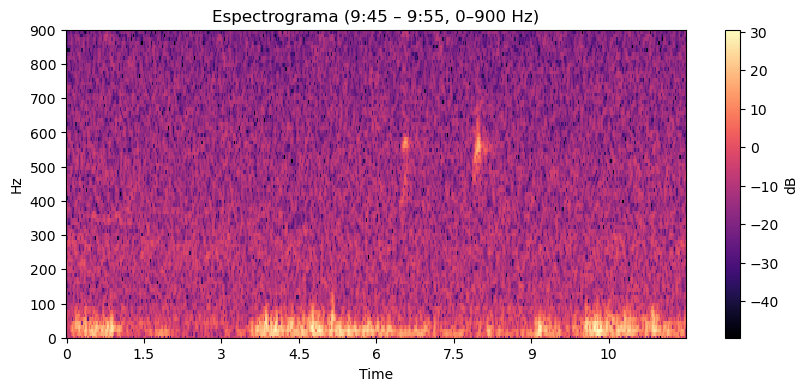

In [607]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Cargar audio completo
y, sr = librosa.load("/media/cunzac/bioinformatica/users/mbarrios/proyectos/calmecac/ostua2025/cantos/files/semana31/2MM05217/Data/2MM05217_20250802_140000.wav")

# Definir el rango de tiempo deseado en segundos
start_sec = 9*60 + 45   # 9 minutos 45 segundos
end_sec = 9*60 + 57     # 9 minutos 55 segundos

# Convertir a índices de muestras
start_sample = int(start_sec * sr)
end_sample = int(end_sec * sr)

# Recortar audio
y_clip = y[start_sample:end_sample]

# Calcular STFT del fragmento
S = librosa.stft(y_clip)
S_db = librosa.amplitude_to_db(abs(S))

# Graficar
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.ylim(0, 900)  # Limitar el eje de frecuencia de 0 a 900 Hz
plt.colorbar(label='dB')
plt.title('Espectrograma (9:45 – 9:55, 0–900 Hz)')
plt.show()



In [ ]:
#from IPython.display import Audio

In [ ]:
#Audio("files/semana32/2MM05175/Data/2MM05175_20250803_150000.wav")

In [481]:
#!pip install sounddevice soundfile
#import sounddevice as sd
#import soundfile as sf

#filename = "files/semana32/2MM05175/Data/2MM05175_20250803_150000.wav"
#data, fs = sf.read(filename)
#sd.play(data, fs)
#sd.wait()

KeyboardInterrupt: 

In [608]:
sorted(df_merged_filt['order'].dropna().unique())

['Accipitriformes',
 'Anseriformes',
 'Apodiformes',
 'Caprimulgiformes',
 'Cathartiformes',
 'Charadriiformes',
 'Ciconiiformes',
 'Columbiformes',
 'Coraciiformes',
 'Cuculiformes',
 'Falconiformes',
 'Galbuliformes',
 'Galliformes',
 'Gruiformes',
 'Nyctibiiformes',
 'Passeriformes',
 'Pelecaniformes',
 'Piciformes',
 'Podicipediformes',
 'Psittaciformes',
 'Strigiformes',
 'Suliformes',
 'Tinamiformes',
 'Trogoniformes']

In [609]:
df_merged_filt.loc[df_merged_filt['order'] == 'Tinamiformes', 'scientific name'].dropna().unique().tolist()

['Crypturellus cinnamomeus', 'Crypturellus soui', 'Tinamus major']

In [610]:
df_merged_filt.loc[df_merged_filt['scientific name'] == 'Pharomachrus mocinno']


Empty DataFrame
Columns: [Selection, View, Channel, Begin Time (s), End Time (s), Low Freq (Hz), High Freq (Hz), Common Name, Species Code, Confidence, Begin Path, File Offset (s), file_code, unique_id, source_path, order, family, scientific name, English name, category, Genus, species, IUCN_status, IUCN_response, IUCN_red_list_category, hora, actividad, recorder, lugar, lugar2, codigo, y, x, hora_inicio, hora_canto, fecha, group_key]
Index: []

[0 rows x 37 columns]

In [ ]:
## Registros a revisar
Pharomachrus mocinno
Melanerpes hoffmannii -- no hay
Melanerpes formicivorus
Ramphastos sulfuratus
Pteroglossus torquatus
Mitrephanes phaeocercus
Cercomacroides tyrannina -- no hay
Diglossa baritula
Aphelocoma unicolor
Cyanocitta stelleri
Formicarius moniliger
Loxia curvirostra
Turdus assimilis
Claravis pretiosa
Chlorestes candida
Colibri thalassinus
Buteogallus anthracinus
Ictinia mississippiensis
Spizaetus tyrannus
Chlorestes candida
Phaethornis longirostris
Phaethornis striigularis
Anarhynchus wilsonia
Arenaria interpres
Calidris mauri
Calidris minutilla
Gelochelidon nilotica
Hydroprogne caspia
Numenius phaeopus
Pluvialis squatarola
Sternula antillarum
Thalasseus maximus
Thalasseus sandvicensis
Tringa flavipes
Tringa melanoleuca
Tringa semipalmata
Tringa solitaria
Momotus mexicanus
Dromococcyx phasianellus
Aramides albiventris
Attila spadiceus
Campylorhynchus chiapensis -- quitar
Cardinalis cardinalis -- quitar
Cassiculus melanicterus
Catharus aurantiirostris
Chiroxiphia linearis  -- confundido con pajaro Bobo
Clibanornis rubiginosus
Coccothraustes abeillei
Dendrocolaptes sanctithomae
Driophlox fuscicauda
Driophlox fuscicauda
Legatus leucophaius
Lepidocolaptes affinis  -- no hay
Lepidocolaptes souleyetii  -- no hay
Manacus candei
Myioborus pictus -- no hay
Oreothlypis superciliosa
Pipilo maculatus -- no hay
Polioptila bilineata
Psaltriparus minimus
Psarocolius montezuma
Psarocolius wagleri
Rhynchocyclus brevirostris -- no hay
Sialis sialis -- quitar

# Analisis Multivariado

In [611]:
# Crear el dataframe
df_merged_filt.columns


Index(['Selection', 'View', 'Channel', 'Begin Time (s)', 'End Time (s)',
       'Low Freq (Hz)', 'High Freq (Hz)', 'Common Name', 'Species Code',
       'Confidence', 'Begin Path', 'File Offset (s)', 'file_code', 'unique_id',
       'source_path', 'order', 'family', 'scientific name', 'English name',
       'category', 'Genus', 'species', 'IUCN_status', 'IUCN_response',
       'IUCN_red_list_category', 'hora', 'actividad', 'recorder', 'lugar',
       'lugar2', 'codigo', 'y', 'x', 'hora_inicio', 'hora_canto', 'fecha',
       'group_key'],
      dtype='object')

In [612]:
df_merged_filt['group_key'].sort_values().unique()

array(['ABab_sem31', 'ABab_sem32', 'ABab_sem33', 'ABab_sem34',
       'ABab_sem35', 'ABab_sem36', 'ABar_sem31', 'ABar_sem32',
       'ABar_sem33', 'ABar_sem34', 'ABar_sem35', 'ABar_sem36',
       'CATp_sem30', 'CATp_sem31', 'CATp_sem32', 'CATp_sem33',
       'CATp_sem34', 'CATp_sem35', 'CATq_sem30', 'CATq_sem31',
       'CATq_sem32', 'CATq_sem33', 'CATq_sem34', 'CATq_sem35',
       'CATq_sem36', 'LTa_sem31', 'LTa_sem32', 'LTa_sem33', 'LTa_sem34',
       'LTa_sem35', 'LTa_sem36', 'LTpot_sem30', 'LTpot_sem31',
       'LTpot_sem32', 'LTpot_sem33', 'LTpot_sem34', 'LTpot_sem35',
       'LTpot_sem36', 'LTpoz_sem30', 'LTpoz_sem31', 'LTpoz_sem32',
       'LTpoz_sem33', 'LTpoz_sem34', 'LTpoz_sem35', 'LTpoz_sem36',
       'MARb_sem19', 'MARb_sem20', 'MARb_sem21', 'MARb_sem22',
       'MARb_sem23', 'MARb_sem24', 'MARb_sem25', 'MARb_sem30',
       'MARb_sem31', 'MARb_sem32', 'MARb_sem33', 'MARb_sem34',
       'MARb_sem35', 'MARb_sem36', 'MARp_sem30', 'MARp_sem31',
       'MARp_sem32', 'MARp_sem33'

In [613]:
print(type(df_merged_filt))

<class 'pandas.core.frame.DataFrame'>


In [614]:
# 1. Crear matriz de abundancia usando pivot_table
species_data = df_merged_filt.pivot_table(
    index='group_key',          # Filas: tus sitios/grupos
    columns='Species Code',  # Columnas: especies
    values='Confidence',        # Valores: usar 'Confidence' como proxy de abundancia
    aggfunc='count',            # Contar ocurrencias (cambia a 'sum' si Confidence es numérico)
    fill_value=0                # Rellenar con 0 donde no haya datos
)

# 2. Ordenar las filas alfabéticamente (opcional)
species_data = species_data.sort_index()

# 3. Renombrar columnas (opcional, para quitar el nombre 'scientific name')
species_data.columns.name = None



In [615]:
# 4. Mostrar el resultado
print(species_data)


             altori  amekes  azchum1  babwre1  baffal1  balori  banswa  \
group_key                                                                
ABab_sem31        3       0        0        1        1       1       0   
ABab_sem32        7       0        0        0        1       0       0   
ABab_sem33        8       0        0        0        1       1       0   
ABab_sem34        0       0        0        1        0       0       0   
ABab_sem35       13       0        0        0        0       1       0   
...             ...     ...      ...      ...      ...     ...     ...   
SUCar_sem36       0       0        0        0        0       0       0   
TIU_sem32         0       0        0        0        0       0       0   
TIU_sem33        25       0        0        0        0       2       0   
TIU_sem34        15       1        0        0        0       2       0   
TIU_sem35        33       0        0        0        0       1       0   

             banwre1  barant1  barswa

In [616]:
df_tidy = species_data.reset_index().melt(
    id_vars='group_key',
    var_name='scientific name',
    value_name='abundance'
)

In [617]:
df_tidy['scientific name'].nunique()
sorted(df_tidy['scientific name'].dropna().unique())

['altori',
 'amekes',
 'azchum1',
 'babwre1',
 'baffal1',
 'balori',
 'banswa',
 'banwre1',
 'barant1',
 'barswa',
 'batpig1',
 'bawmoc1',
 'bawwar',
 'bbwduc',
 'bcnher',
 'bcwpar1',
 'belkin1',
 'berhum',
 'bkvori',
 'blbgra1',
 'blcchl1',
 'blhsal1',
 'blhtro1',
 'blkpho',
 'blkvul',
 'bltjay1',
 'bltmot1',
 'blugrb1',
 'bncfly',
 'bobfly1',
 'bobher1',
 'brbsol1',
 'brcvir1',
 'brnjay',
 'brnowl',
 'brwhaw',
 'btnwar',
 'btther1',
 'bucjay1',
 'bucmot2',
 'butsal1',
 'categr',
 'ccbfin',
 'cinhum1',
 'cittro1',
 'clcrob',
 'cliswa',
 'cobtan1',
 'coffal1',
 'cogdov',
 'coltro1',
 'comgal1',
 'compau',
 'comter',
 'crebob1',
 'cregua1',
 'dstkne',
 'ducfly',
 'easblu',
 'easkin',
 'easmea',
 'eawpew',
 'eleeup1',
 'eletro',
 'eyrfla1',
 'fepowl',
 'flctan',
 'fotfly',
 'fuwduc',
 'gartro1',
 'gbwwre1',
 'gcrwar',
 'gofwoo',
 'goowoo1',
 'grasal2',
 'graspa',
 'grbani',
 'grbher3',
 'grbspa1',
 'grcfly',
 'greegr',
 'grekis',
 'grepew',
 'gretin1',
 'grhowl',
 'grnher',
 'grnjay',
 '

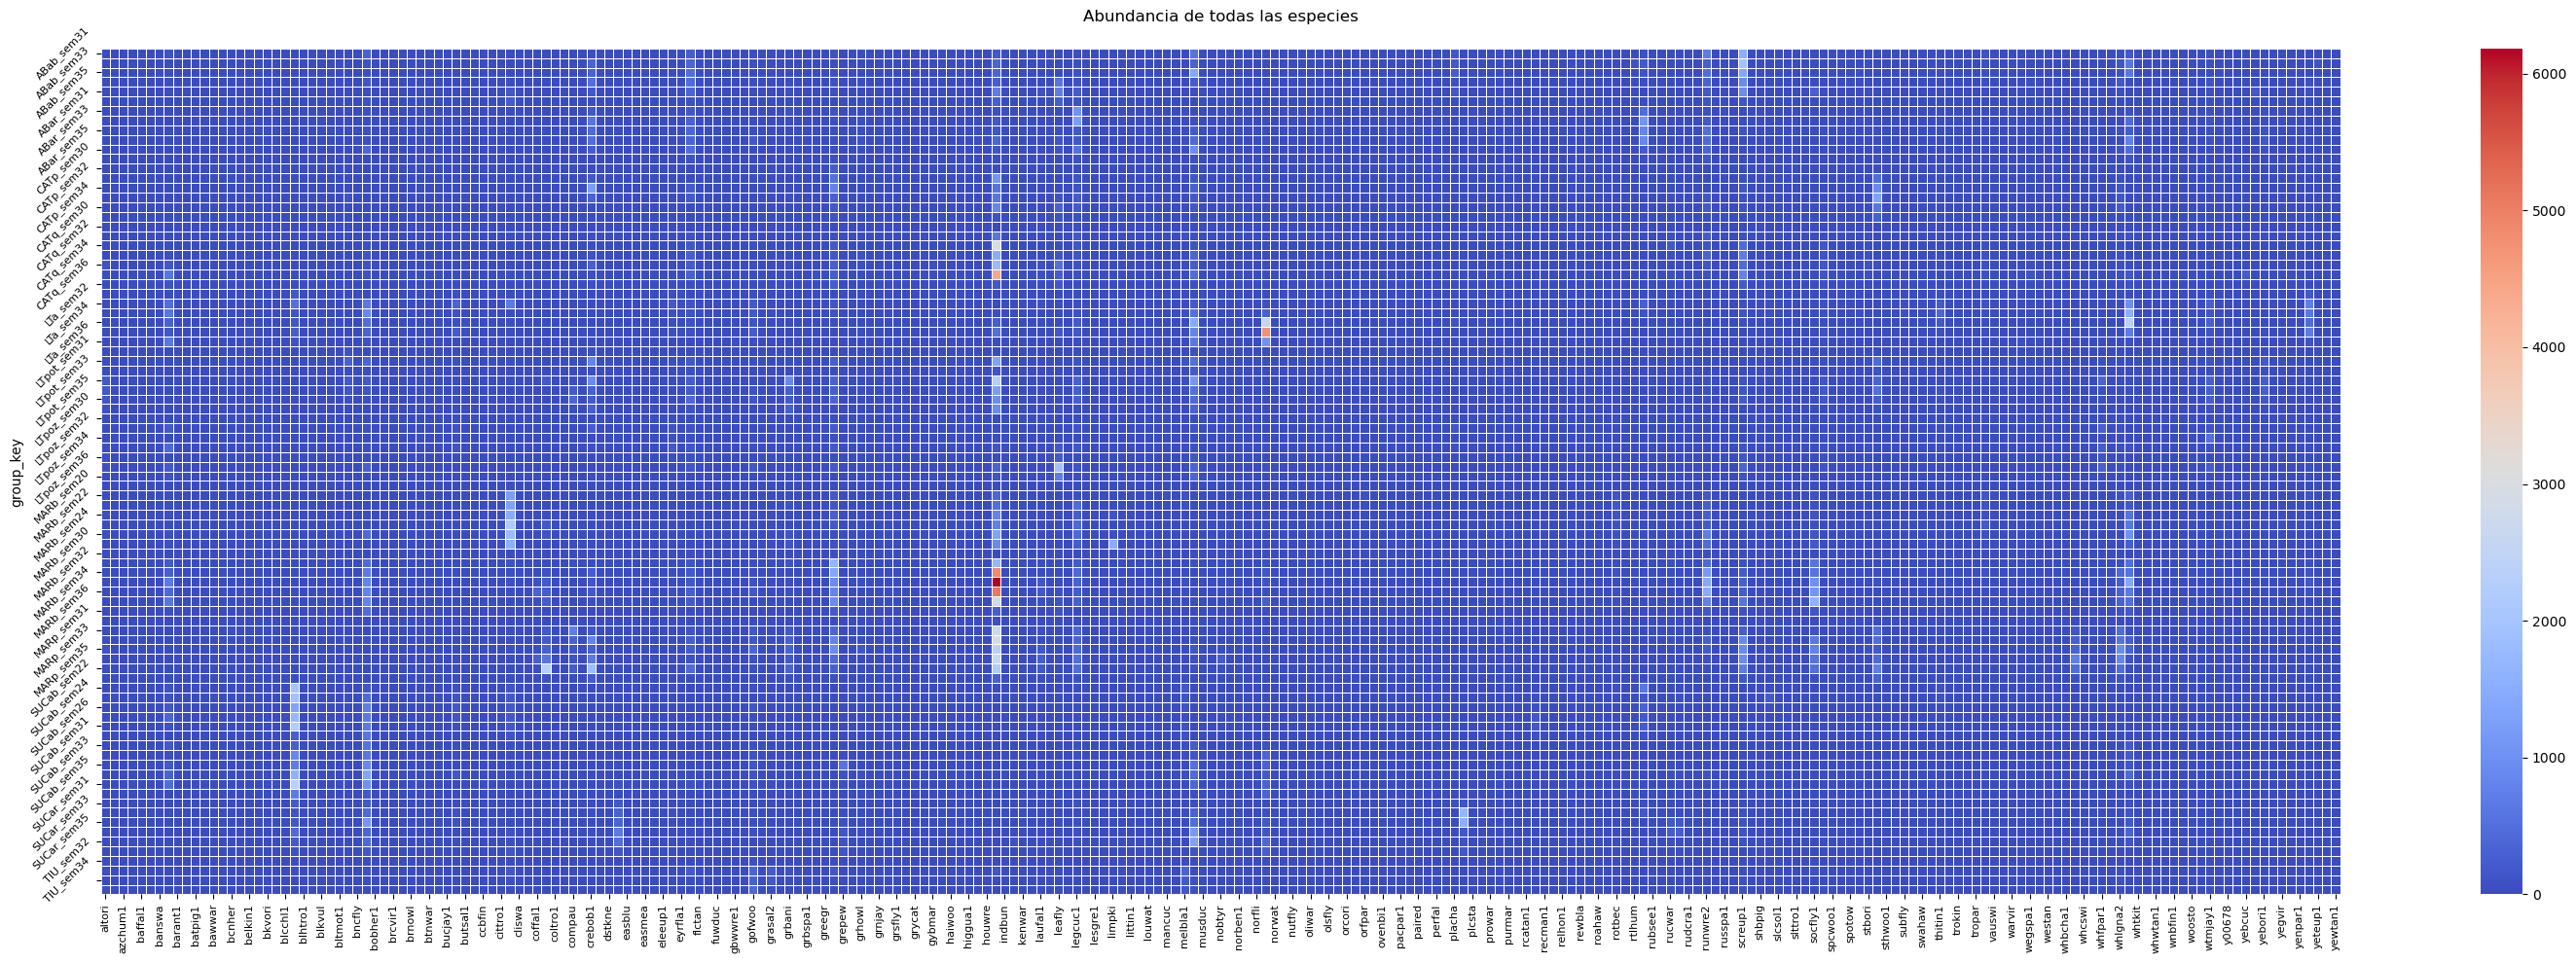

In [618]:
# Heatmap de paisaje acustico por semana-codigo y especies
plt.figure(figsize=(30, 10))  # Tamaño grande

# Heatmap con ajustes
ax = sns.heatmap(
    species_data,
    annot=False,
    fmt="d",
    cmap="coolwarm",
    annot_kws={"size": 1},
    linewidths=0.5
)

# Rotar etiquetas y ajustar tamaño
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45,fontsize=8)

plt.title("Abundancia de todas las especies", pad=20)
plt.tight_layout()

# Create the filename using the group_key pattern
filename = f"images/heatmap.svg"
    
# Ensure the directory exists
import os
os.makedirs("images", exist_ok=True)
    
# Save the figure
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

In [632]:
df_merged_filt['semana']='s_'+df_merged_filt['source_path'].str.extract(r'semana(\d+)')

In [654]:
semanas_excluir = [
    "s_19",
    "s_20",
    "s_21",
    "s_22",
    "s_23",
    "s_24",
    "s_25",
    "s_26",
    "s_27",
    "s_30",
    "s_31",
    "s_36"
]

# Filtrar (mantener solo las especies que no están en la lista)
df_merged_filt2 = df_merged_filt[~df_merged_filt['semana'].isin(semanas_excluir)]

# Reiniciar índice para evitar problemas posteriores
df_merged_filt2 = df_merged_filt2.reset_index(drop=True)

In [655]:
#df_merged_filt['lugar'].unique()
df_merged_filt2.columns


Index(['Selection', 'View', 'Channel', 'Begin Time (s)', 'End Time (s)',
       'Low Freq (Hz)', 'High Freq (Hz)', 'Common Name', 'Species Code',
       'Confidence', 'Begin Path', 'File Offset (s)', 'file_code', 'unique_id',
       'source_path', 'order', 'family', 'scientific name', 'English name',
       'category', 'Genus', 'species', 'IUCN_status', 'IUCN_response',
       'IUCN_red_list_category', 'hora', 'actividad', 'recorder', 'lugar',
       'lugar2', 'codigo', 'y', 'x', 'hora_inicio', 'hora_canto', 'fecha',
       'group_key', 'semana'],
      dtype='object')

In [665]:
# 1. Crear matriz de abundancia 
species_data2 = df_merged_filt2.pivot_table(
    index='semana',          # Filas
    columns='codigo',        # Columnas
    values='Species Code',   # Codigo de especies
    aggfunc='count',         # Contar ocurrencias
    fill_value=0             # Rellenar con 0 donde no haya datos
)

# 2. Ordenar las filas alfabéticamente
species_data2 = species_data2.sort_index()

# 3. Renombrar columnas para quitar el nombre 'codigo'
species_data2.columns.name = None



In [666]:
species_data2

ABab  ABar  CATp  CATq   LTa  LTpot  LTpoz   MARb   MARp  SUCab  \
semana                                                                    
s_32    5437  4726  4572  4990  6623    759    876  11735   9849   2682   
s_33    5921  3717  3752  4518  6486   8734   2622  14943   9833   3806   
s_34    4587  4830  2997  5124  9428   5550    905  13078   9926   5197   
s_35    5165  4334   707  8561  9801   4940   5068  10533  11529   5117   

        SUCar   TIU  
semana               
s_32     3746    95  
s_33     4796  2219  
s_34     4421  1340  
s_35     3728  1188

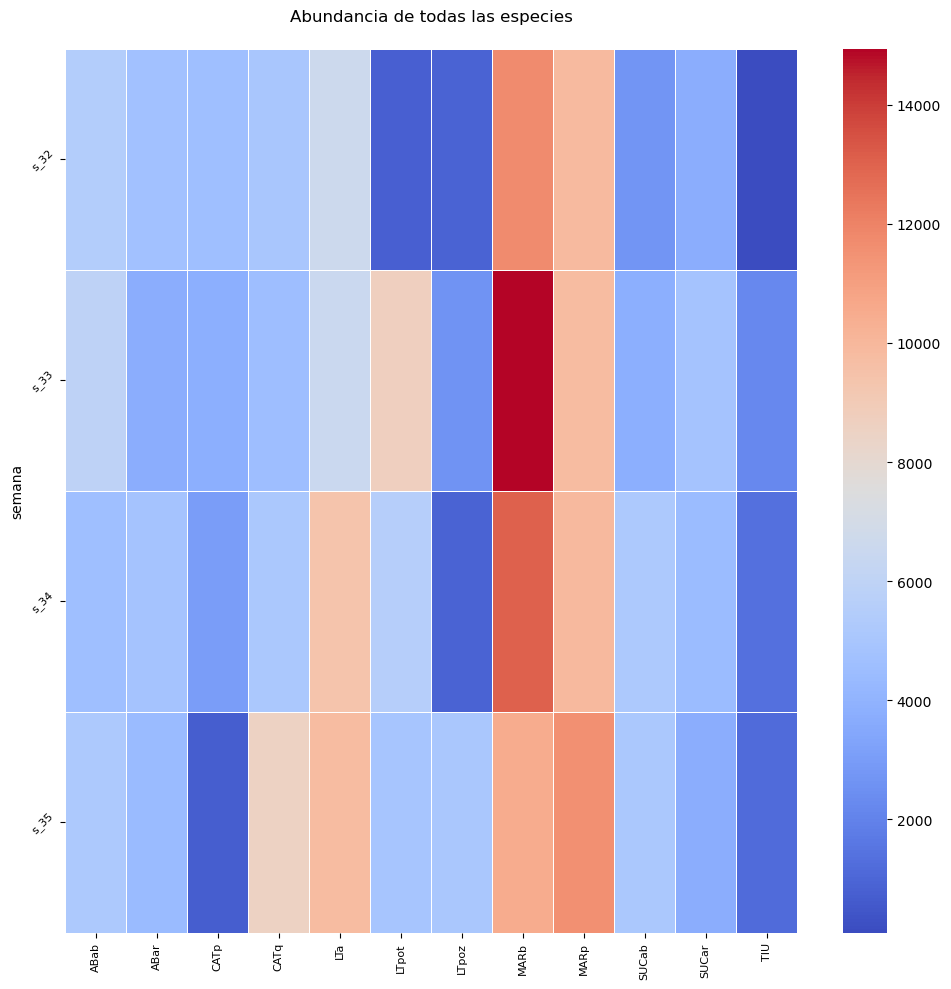

In [667]:
# Elaborar heatmap de paisaje acustico por especies y semanas
plt.figure(figsize=(10, 10))  # Tamaño grande

# Heatmap con ajustes
ax = sns.heatmap(
    species_data2,
    annot=False,
    fmt="d",
    cmap="coolwarm",
    annot_kws={"size": 1},
    linewidths=0.5
)

# Rotar etiquetas y ajustar tamaño
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45,fontsize=8)

plt.title("Abundancia de todas las especies", pad=20)
plt.tight_layout()

# Create the filename using the group_key pattern
filename = f"images/heatmap2.svg"
    
# Ensure the directory exists
import os
os.makedirs("images", exist_ok=True)
    
# Save the figure
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

In [668]:
df_merged_filt2

Selection           View  Channel  Begin Time (s)  End Time (s)  \
0               5  Spectrogram 1        1            57.0          60.0   
1               6  Spectrogram 1        1            60.0          63.0   
2              15  Spectrogram 1        1           324.0         327.0   
3              16  Spectrogram 1        1           330.0         333.0   
4              17  Spectrogram 1        1           399.0         402.0   
...           ...            ...      ...             ...           ...   
265486          8  Spectrogram 1        1          1068.0        1071.0   
265487          1  Spectrogram 1        1           624.0         627.0   
265488          2  Spectrogram 1        1           636.0         639.0   
265489          4  Spectrogram 1        1           660.0         663.0   
265490          6  Spectrogram 1        1           669.0         672.0   

        Low Freq (Hz)  High Freq (Hz)                Common Name Species Code  \
0                   0           15000    White-lored Gnatcatcher      whlgna2   
1                   0           15000    White-lored Gnatcatcher      whlgna2   
2                   0           15000    White-lored Gnatcatcher      whlgna2   
3                   0           15000    White-lored Gnatcatcher      whlgna2   
4                   0           15000    White-lored Gnatcatcher      whlgna2   
...               ...             ...                        ...          ...   
265486              0           15000  Golden-fronted Woodpecker       gofwoo   
265487              0           15000  Cinnamon-bellied Saltator      grasal2   
265488              0           15000  Cinnamon-bellied Saltator      grasal2   
265489              0           15000  Cinnamon-bellied Saltator      grasal2   
265490              0           15000  Cinnamon-bellied Saltator      grasal2   

        Confidence  ...    lugar       lugar2 codigo          y          x  \
0           0.5994  ...  La Tuna  poza bosque  LTpoz  14.446105 -89.697296   
1           0.8437  ...  La Tuna  poza bosque  LTpoz  14.446105 -89.697296   
2           0.7939  ...  La Tuna  poza bosque  LTpoz  14.446105 -89.697296   
3           0.6084  ...  La Tuna  poza bosque  LTpoz  14.446105 -89.697296   
4           0.7888  ...  La Tuna  poza bosque  LTpoz  14.446105 -89.697296   
...            ...  ...      ...          ...    ...        ...        ...   
265486      0.5226  ...   Tiucal       Tiucal    TIU  14.275370 -89.731590   
265487      0.5014  ...   Tiucal       Tiucal    TIU  14.275370 -89.731590   
265488      0.5880  ...   Tiucal       Tiucal    TIU  14.275370 -89.731590   
265489      0.5456  ...   Tiucal       Tiucal    TIU  14.275370 -89.731590   
265490      0.7116  ...   Tiucal       Tiucal    TIU  14.275370 -89.731590   

       hora_inicio hora_canto     fecha    group_key semana  
0           090000   09:00:57  20250810  LTpoz_sem32   s_32  
1           090000   09:01:00  20250810  LTpoz_sem32   s_32  
2           090000   09:05:24  20250810  LTpoz_sem32   s_32  
3           090000   09:05:30  20250810  LTpoz_sem32   s_32  
4           090000   09:06:39  20250810  LTpoz_sem32   s_32  
...            ...        ...       ...          ...    ...  
265486      090000   09:17:48  20250831    TIU_sem35   s_35  
265487      100000   10:10:24  20250831    TIU_sem35   s_35  
265488      100000   10:10:36  20250831    TIU_sem35   s_35  
265489      100000   10:11:00  20250831    TIU_sem35   s_35  
265490      100000   10:11:09  20250831    TIU_sem35   s_35  

[265491 rows x 38 columns]

In [669]:
df_merged_filt2.columns

Index(['Selection', 'View', 'Channel', 'Begin Time (s)', 'End Time (s)',
       'Low Freq (Hz)', 'High Freq (Hz)', 'Common Name', 'Species Code',
       'Confidence', 'Begin Path', 'File Offset (s)', 'file_code', 'unique_id',
       'source_path', 'order', 'family', 'scientific name', 'English name',
       'category', 'Genus', 'species', 'IUCN_status', 'IUCN_response',
       'IUCN_red_list_category', 'hora', 'actividad', 'recorder', 'lugar',
       'lugar2', 'codigo', 'y', 'x', 'hora_inicio', 'hora_canto', 'fecha',
       'group_key', 'semana'],
      dtype='object')

In [675]:
df_merged_filt2_riqueza = (
    df_merged_filt2[['scientific name', 'order', 'family', 'codigo']]
    .drop_duplicates(subset=['codigo', 'scientific name'])
)
df_merged_filt2_riqueza

scientific name             order  \
0             Polioptila albiloris     Passeriformes   
11                             NaN               NaN   
12                   Strix virgata      Strigiformes   
13      Hesperoburhinus bistriatus   Charadriiformes   
19          Glaucidium brasilianum      Strigiformes   
...                            ...               ...   
264764  Campylopterus hemileucurus       Apodiformes   
264811      Nyctidromus albicollis  Caprimulgiformes   
264954         Tigrisoma mexicanum    Pelecaniformes   
265099        Thryophilus rufalbus     Passeriformes   
265471               Sialia sialis     Passeriformes   

                                         family codigo  
0                  Polioptilidae (Gnatcatchers)  LTpoz  
11                                          NaN  LTpoz  
12                             Strigidae (Owls)  LTpoz  
13                     Burhinidae (Thick-knees)  LTpoz  
19                             Strigidae (Owls)  LTpoz  
...                                         ...    ...  
264764               Trochilidae (Hummingbirds)    TIU  
264811     Caprimulgidae (Nightjars and Allies)    TIU  
264954  Ardeidae (Herons, Egrets, and Bitterns)    TIU  
265099                    Troglodytidae (Wrens)    TIU  
265471           Turdidae (Thrushes and Allies)    TIU  

[1069 rows x 4 columns]

In [676]:
# 1. Crear matriz de abundancia 
species_data3 = df_merged_filt2_riqueza.pivot_table(
    index='codigo',          # Filas
    columns='order',        # Columnas
    values='scientific name',   # contar por especies
    aggfunc='count',         # Contar ocurrencias
    fill_value=0             # Rellenar con 0 donde no haya datos
)

# 2. Ordenar las filas alfabéticamente
species_data3 = species_data3.sort_index()

# 3. Renombrar columnas para quitar el nombre 'codigo'
species_data3.columns.name = None

In [693]:
# 1. logaritmo
species_data3_log = np.log(species_data3+1)  

# Estandarización (media 0, desviación estándar 1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
species_data3_scaled = pd.DataFrame(
    scaler.fit_transform(species_data3),
    columns=species_data3.columns,
    index=species_data3.index   # Mantiene las etiquetas de las filas
)

#3. Normalización Min-Max (escala 0 a 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
species_data3_norm = pd.DataFrame(
    scaler.fit_transform(species_data3),
    columns=species_data3.columns,
    index=species_data3.index   # Mantiene las etiquetas de las filas
)

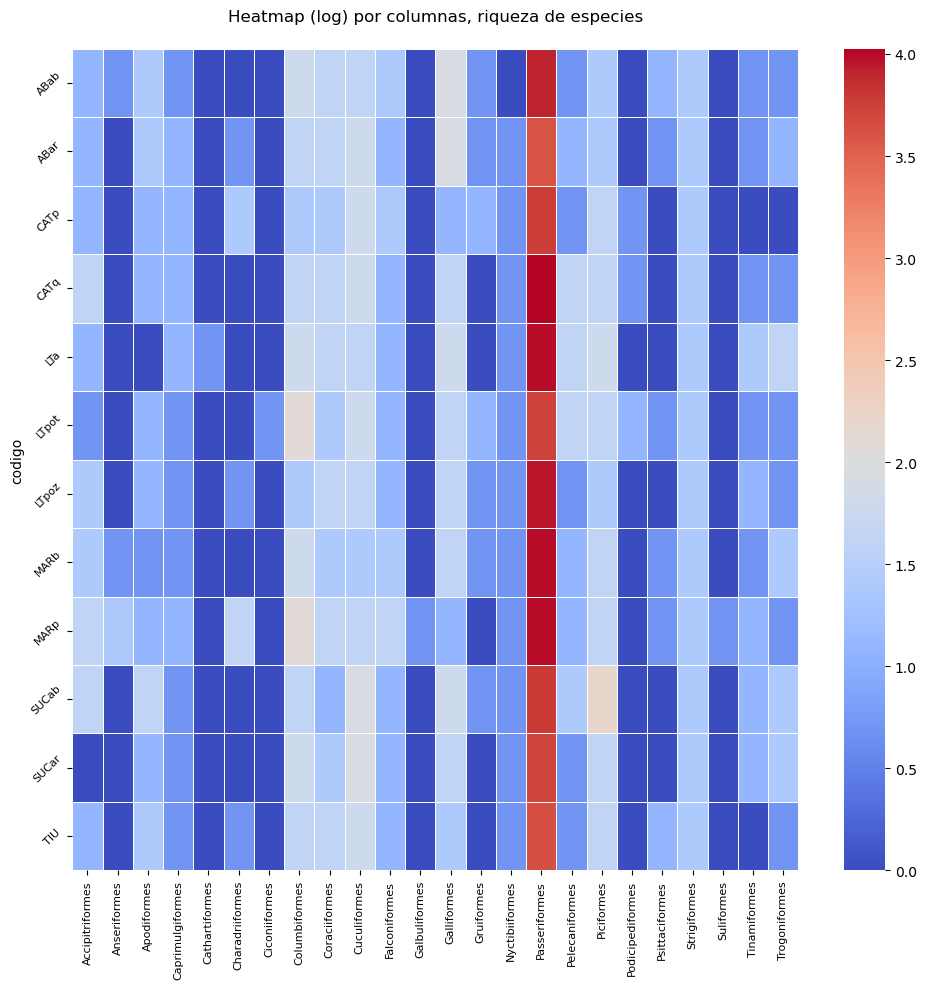

In [694]:
# Elaborar heatmap de riqueza
plt.figure(figsize=(10, 10))  # Tamaño grande

# Heatmap con ajustes
ax = sns.heatmap(
    species_data3_log,
    annot=False,
    fmt="d",
    cmap="coolwarm",
    annot_kws={"size": 1},
    linewidths=0.5
)

# Rotar etiquetas y ajustar tamaño
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45,fontsize=8)

plt.title("Heatmap (log) por columnas, riqueza de especies", pad=20)
plt.tight_layout()

# Create the filename using the group_key pattern
filename = f"images/heatmap-log-riqueza.svg"
    
# Ensure the directory exists
import os
os.makedirs("images", exist_ok=True)
    
# Save the figure
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

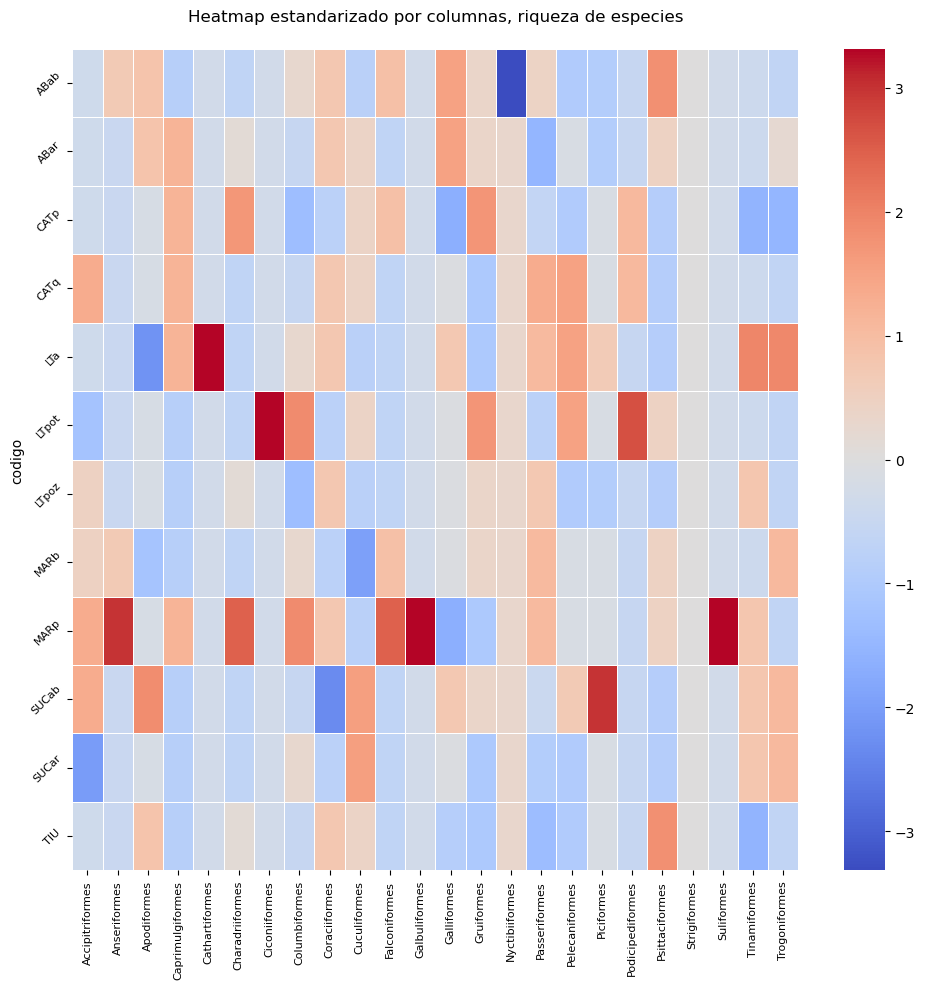

In [695]:
# Elaborar heatmap de riqueza
plt.figure(figsize=(10, 10))  # Tamaño grande

# Heatmap con ajustes
ax = sns.heatmap(
    species_data3_scaled,
    annot=False,
    fmt="d",
    cmap="coolwarm",
    annot_kws={"size": 1},
    linewidths=0.5
)

# Rotar etiquetas y ajustar tamaño
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45,fontsize=8)

plt.title("Heatmap estandarizado por columnas, riqueza de especies", pad=20)
plt.tight_layout()

# Create the filename using the group_key pattern
filename = f"images/heatmap-scaled-riqueza.svg"
    
# Ensure the directory exists
import os
os.makedirs("images", exist_ok=True)
    
# Save the figure
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

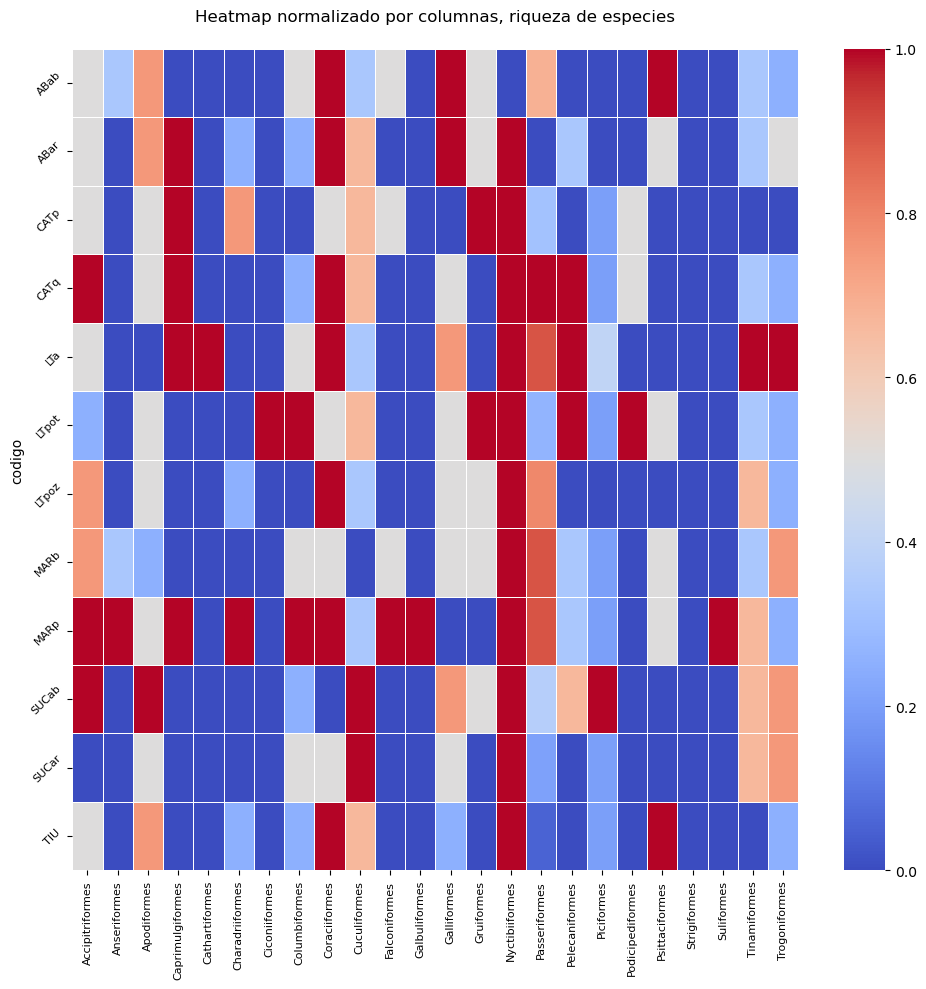

In [696]:
# Elaborar heatmap de riqueza
plt.figure(figsize=(10, 10))  # Tamaño grande

# Heatmap con ajustes
ax = sns.heatmap(
    species_data3_norm,
    annot=False,
    fmt="d",
    cmap="coolwarm",
    annot_kws={"size": 1},
    linewidths=0.5
)

# Rotar etiquetas y ajustar tamaño
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45,fontsize=8)

plt.title("Heatmap normalizado por columnas, riqueza de especies", pad=20)
plt.tight_layout()

# Create the filename using the group_key pattern
filename = f"images/heatmap-norm-riqueza.svg"
    
# Ensure the directory exists
import os
os.makedirs("images", exist_ok=True)
    
# Save the figure
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

In [718]:
df_merged_filt2.columns

Index(['Selection', 'View', 'Channel', 'Begin Time (s)', 'End Time (s)',
       'Low Freq (Hz)', 'High Freq (Hz)', 'Common Name', 'Species Code',
       'Confidence', 'Begin Path', 'File Offset (s)', 'file_code', 'unique_id',
       'source_path', 'order', 'family', 'scientific name', 'English name',
       'category', 'Genus', 'species', 'IUCN_status', 'IUCN_response',
       'IUCN_red_list_category', 'hora', 'actividad', 'recorder', 'lugar',
       'lugar2', 'codigo', 'y', 'x', 'hora_inicio', 'hora_canto', 'fecha',
       'group_key', 'semana'],
      dtype='object')

In [850]:
df_merged_filt3_riqueza = (
    df_merged_filt2[['scientific name', 'order', 'family', 'codigo', 'Species Code', 'group_key', 'IUCN_red_list_category']]
    .drop_duplicates(subset=['codigo', 'scientific name'])
)

df_merged_filt3_riqueza = df_merged_filt3_riqueza[~df_merged_filt3_riqueza['order'].str.contains('nocall', case=False, na=False)]
df_merged_filt3_riqueza = df_merged_filt3_riqueza.dropna()
df_merged_filt3_riqueza#['group_key'].unique().tolist()

scientific name             order  \
0             Polioptila albiloris     Passeriformes   
19          Glaucidium brasilianum      Strigiformes   
58               Icterus chrysater     Passeriformes   
61             Leptotila verreauxi     Columbiformes   
62               Colinus cristatus       Galliformes   
...                            ...               ...   
264764  Campylopterus hemileucurus       Apodiformes   
264811      Nyctidromus albicollis  Caprimulgiformes   
264954         Tigrisoma mexicanum    Pelecaniformes   
265099        Thryophilus rufalbus     Passeriformes   
265471               Sialia sialis     Passeriformes   

                                         family codigo Species Code  \
0                  Polioptilidae (Gnatcatchers)  LTpoz      whlgna2   
19                             Strigidae (Owls)  LTpoz       fepowl   
58             Icteridae (Troupials and Allies)  LTpoz      yebori1   
61               Columbidae (Pigeons and Doves)  LTpoz       whtdov   
62             Odontophoridae (New World Quail)  LTpoz      crebob1   
...                                         ...    ...          ...   
264764               Trochilidae (Hummingbirds)    TIU      viosab1   
264811     Caprimulgidae (Nightjars and Allies)    TIU       compau   
264954  Ardeidae (Herons, Egrets, and Bitterns)    TIU      btther1   
265099                    Troglodytidae (Wrens)    TIU      rawwre1   
265471           Turdidae (Thrushes and Allies)    TIU       easblu   

          group_key IUCN_red_list_category  
0       LTpoz_sem32                     LC  
19      LTpoz_sem32                     LC  
58      LTpoz_sem32                     LC  
61      LTpoz_sem32                     LC  
62      LTpoz_sem32                     LC  
...             ...                    ...  
264764    TIU_sem35                     LC  
264811    TIU_sem35                     LC  
264954    TIU_sem35                     LC  
265099    TIU_sem35                     LC  
265471    TIU_sem35                     LC  

[1009 rows x 7 columns]

In [851]:
species_data

altori  amekes  azchum1  babwre1  baffal1  balori  banswa  \
group_key                                                                
ABab_sem31        3       0        0        1        1       1       0   
ABab_sem32        7       0        0        0        1       0       0   
ABab_sem33        8       0        0        0        1       1       0   
ABab_sem34        0       0        0        1        0       0       0   
ABab_sem35       13       0        0        0        0       1       0   
...             ...     ...      ...      ...      ...     ...     ...   
SUCar_sem36       0       0        0        0        0       0       0   
TIU_sem32         0       0        0        0        0       0       0   
TIU_sem33        25       0        0        0        0       2       0   
TIU_sem34        15       1        0        0        0       2       0   
TIU_sem35        33       0        0        0        0       1       0   

             banwre1  barant1  barswa  ...  yebfly  yebori1  yefgra1  yegvir  \
group_key                              ...                                     
ABab_sem31       114        0       0  ...       0       17        0       0   
ABab_sem32         8        0       0  ...       0        4        0       0   
ABab_sem33        43        0       0  ...       0        4        0       0   
ABab_sem34        63        0       0  ...       0        4        0       0   
ABab_sem35        46        0       0  ...     181        6        0       0   
...              ...      ...     ...  ...     ...      ...      ...     ...   
SUCar_sem36        0        0       0  ...       0        0        0       0   
TIU_sem32          0        0       0  ...       0        0        0       0   
TIU_sem33          0        0       0  ...       5        1        0       0   
TIU_sem34          0        0       0  ...       0        0        0       0   
TIU_sem35          0        0       0  ...       0        1        0       0   

             yelwar  yenpar1  yeofly1  yeteup1  yetori1  yewtan1  
group_key                                                         
ABab_sem31        0        0        0       46        0        0  
ABab_sem32        0        0        0      100        0        0  
ABab_sem33        0        0        4       16        0        0  
ABab_sem34        0        0       50       42        0        0  
ABab_sem35        0        0       63       14        0        0  
...             ...      ...      ...      ...      ...      ...  
SUCar_sem36       0        0        0        0        0        0  
TIU_sem32         0        0        0        0        0        0  
TIU_sem33         0        0        3        0        0        0  
TIU_sem34         0        0        0        3        0        0  
TIU_sem35         0        0        0        0        0        0  

[88 rows x 249 columns]

In [852]:
# 1. Crear matriz de abundancia 
species_data4 = df_merged_filt3_riqueza.pivot_table(
    index='codigo',          # Filas
    columns='Species Code',        # Columnas
    values='scientific name',   # contar por especies
    aggfunc='count',         # Contar ocurrencias
    fill_value=0             # Rellenar con 0 donde no haya datos
)

# 2. Ordenar las filas alfabéticamente
species_data4 = species_data4.sort_index()

# 3. Renombrar columnas para quitar el nombre 'codigo'
species_data4.columns.name = None

In [853]:
df_merged_filt2['IUCN_red_list_category'].dropna().unique().tolist()

['LC', 'NT', 'EN', 'VU']

In [856]:
order_bar

Species Code
whlgna2    Passeriformes
fepowl      Strigiformes
yebori1    Passeriformes
whtdov     Columbiformes
crebob1      Galliformes
               ...      
lesgre1    Passeriformes
norwat     Passeriformes
woewar1    Passeriformes
woothr     Passeriformes
macwar     Passeriformes
Name: order, Length: 217, dtype: object

In [866]:
# Extraer pares únicos de especie y categoría IUCN
iucn_status = df_merged_filt3_riqueza[['Species Code', 'IUCN_red_list_category']].drop_duplicates()
order_bar = df_merged_filt3_riqueza[['Species Code', 'order']].drop_duplicates()

# Convertir a Series (index: especie, valores: categoría IUCN)
iucn_status = iucn_status.set_index('Species Code')['IUCN_red_list_category']
order_bar = order_bar.set_index('Species Code')['order']

# Verificar
print(iucn_status.head())
print(order_bar.head())

# Paleta de colores para cada categoría IUCN
iucn_palette = {
    "Not_IUCN": 'gray',
    "LC": "green",    # Least Concern
    "NT": "yellow",   # Near Threatened
    "VU": "orange",   # Vulnerable
    "EN": "red",      # Endangered
    "CR": "purple"    # Critically Endangered
}

# Paleta de colores para cada categoría de ordenes

n = len(set(order_bar))  # 24 órdenes
paleta = sns.color_palette("tab20", n_colors=n)  # paleta cualitativa de 20+, se repite si es necesario
colors_orden = dict(zip(sorted(set(order_bar)), paleta))

# Gris para None
colors_orden[None] = (0.5,0.5,0.5)


Species Code
whlgna2    LC
fepowl     LC
yebori1    LC
whtdov     LC
crebob1    LC
Name: IUCN_red_list_category, dtype: object
Species Code
whlgna2    Passeriformes
fepowl      Strigiformes
yebori1    Passeriformes
whtdov     Columbiformes
crebob1      Galliformes
Name: order, dtype: object


In [876]:
colors_orden

{'Accipitriformes': (0.12156862745098039,
  0.4666666666666667,
  0.7058823529411765),
 'Anseriformes': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'Apodiformes': (1.0, 0.4980392156862745, 0.054901960784313725),
 'Caprimulgiformes': (1.0, 0.7333333333333333, 0.47058823529411764),
 'Cathartiformes': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313),
 'Charadriiformes': (0.596078431372549,
  0.8745098039215686,
  0.5411764705882353),
 'Ciconiiformes': (0.8392156862745098,
  0.15294117647058825,
  0.1568627450980392),
 'Columbiformes': (1.0, 0.596078431372549, 0.5882352941176471),
 'Coraciiformes': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'Cuculiformes': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'Falconiformes': (0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354),
 'Galbuliformes': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'Galliformes': (0.8901960784313725, 0.4666666666666667,

In [872]:
# species_data.columns debe contener los nombres comunes de las especies (mismo formato que en iucn_status)
iucn_colors = iucn_status.reindex(species_data.columns).map(iucn_palette).to_frame("IUCN")
order_colors = order_bar.reindex(species_data.columns).map(colors_orden).to_frame("Ordenes")

In [874]:
iucn_colors

IUCN
altori   green
amekes   green
azchum1  green
babwre1  green
baffal1  green
...        ...
yenpar1    NaN
yeofly1    NaN
yeteup1  green
yetori1  green
yewtan1    NaN

[249 rows x 1 columns]

In [858]:
sorted(iucn_status.dropna().unique())

['EN', 'LC', 'NT', 'VU']

In [859]:
assert species_data.isnull().sum().sum() == 0, "¡Hay valores nulos en species_data!"
assert (species_data.dtypes != 'object').all(), "species_data contiene columnas no numéricas"


In [860]:
#print("species_data.columns:", list(species_data.columns)[:5])
#print("iucn_colors.index:", list(iucn_colors.index)[:5])

In [861]:
# 1. logaritmo
species_data4_log = np.log(species_data4+1)  

#2 Estandarización (media 0, desviación estándar 1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
species_data4_scaled = pd.DataFrame(
    scaler.fit_transform(species_data4),
    columns=species_data4.columns,
    index=species_data4.index   # Mantiene las etiquetas de las filas
)

#3. Normalización Min-Max (escala 0 a 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
species_data4_norm = pd.DataFrame(
    scaler.fit_transform(species_data4),
    columns=species_data4.columns,
    index=species_data4.index   # Mantiene las etiquetas de las filas
)

In [862]:
species_data4_log

altori    amekes   azchum1   babwre1   baffal1    balori    banswa  \
codigo                                                                         
ABab    0.693147  0.000000  0.000000  0.693147  0.693147  0.693147  0.000000   
ABar    0.693147  0.000000  0.000000  0.693147  0.000000  0.000000  0.000000   
CATp    0.693147  0.000000  0.000000  0.000000  0.000000  0.693147  0.693147   
CATq    0.693147  0.000000  0.000000  0.693147  0.000000  0.693147  0.000000   
LTa     0.693147  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
LTpot   0.693147  0.000000  0.000000  0.000000  0.693147  0.693147  0.000000   
LTpoz   0.693147  0.000000  0.000000  0.693147  0.000000  0.693147  0.000000   
MARb    0.693147  0.000000  0.000000  0.693147  0.693147  0.000000  0.000000   
MARp    0.693147  0.693147  0.000000  0.693147  0.000000  0.693147  0.000000   
SUCab   0.693147  0.000000  0.693147  0.693147  0.000000  0.693147  0.000000   
SUCar   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
TIU     0.693147  0.693147  0.000000  0.000000  0.000000  0.693147  0.000000   

         banwre1   barant1    barswa  ...    y00678   yebcac1    yebcuc  \
codigo                                ...                                 
ABab    0.693147  0.000000  0.000000  ...  0.000000  0.693147  0.693147   
ABar    0.693147  0.000000  0.693147  ...  0.000000  0.693147  0.693147   
CATp    0.693147  0.000000  0.000000  ...  0.693147  0.000000  0.693147   
CATq    0.693147  0.000000  0.000000  ...  0.000000  0.000000  0.693147   
LTa     0.693147  0.000000  0.000000  ...  0.000000  0.000000  0.693147   
LTpot   0.693147  0.693147  0.000000  ...  0.000000  0.000000  0.693147   
LTpoz   0.693147  0.000000  0.000000  ...  0.000000  0.000000  0.693147   
MARb    0.693147  0.000000  0.000000  ...  0.000000  0.693147  0.000000   
MARp    0.693147  0.000000  0.693147  ...  0.000000  0.693147  0.693147   
SUCab   0.693147  0.693147  0.000000  ...  0.000000  0.000000  0.693147   
SUCar   0.693147  0.693147  0.000000  ...  0.000000  0.693147  0.693147   
TIU     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.693147   

          yebfly   yebori1   yefgra1    yegvir    yelwar   yeteup1   yetori1  
codigo                                                                        
ABab    0.693147  0.693147  0.000000  0.000000  0.000000  0.693147  0.000000  
ABar    0.693147  0.693147  0.000000  0.000000  0.000000  0.000000  0.693147  
CATp    0.000000  0.693147  0.000000  0.000000  0.000000  0.693147  0.000000  
CATq    0.000000  0.693147  0.693147  0.000000  0.000000  0.693147  0.000000  
LTa     0.693147  0.693147  0.000000  0.693147  0.000000  0.693147  0.000000  
LTpot   0.693147  0.693147  0.693147  0.000000  0.000000  0.693147  0.693147  
LTpoz   0.000000  0.693147  0.000000  0.000000  0.000000  0.693147  0.000000  
MARb    0.000000  0.000000  0.693147  0.000000  0.693147  0.693147  0.000000  
MARp    0.693147  0.693147  0.000000  0.000000  0.693147  0.693147  0.000000  
SUCab   0.693147  0.693147  0.000000  0.000000  0.000000  0.000000  0.000000  
SUCar   0.693147  0.693147  0.000000  0.693147  0.693147  0.000000  0.000000  
TIU     0.693147  0.693147  0.000000  0.000000  0.000000  0.693147  0.000000  

[12 rows x 217 columns]

In [863]:
species_data4_scaled.columns[(species_data4_scaled == 0).all()]

Index(['bobfly1', 'bucmot2', 'clcrob', 'compau', 'crebob1', 'fepowl', 'gofwoo',
       'grbani', 'grhowl', 'incdov', 'legcuc1', 'melbla1', 'noremt1', 'rucwar',
       'screup1', 'spbori', 'squcuc1'],
      dtype='object')

In [864]:
species_data4_log = species_data4_scaled.loc[:, (species_data4_log != 0).any()]
species_data4_scaled = species_data4_scaled.loc[:, (species_data4_scaled != 0).any()]
species_data4_norm = species_data4_norm.loc[:, (species_data4_norm != 0).any()]

<Figure size 2000x1000 with 0 Axes>

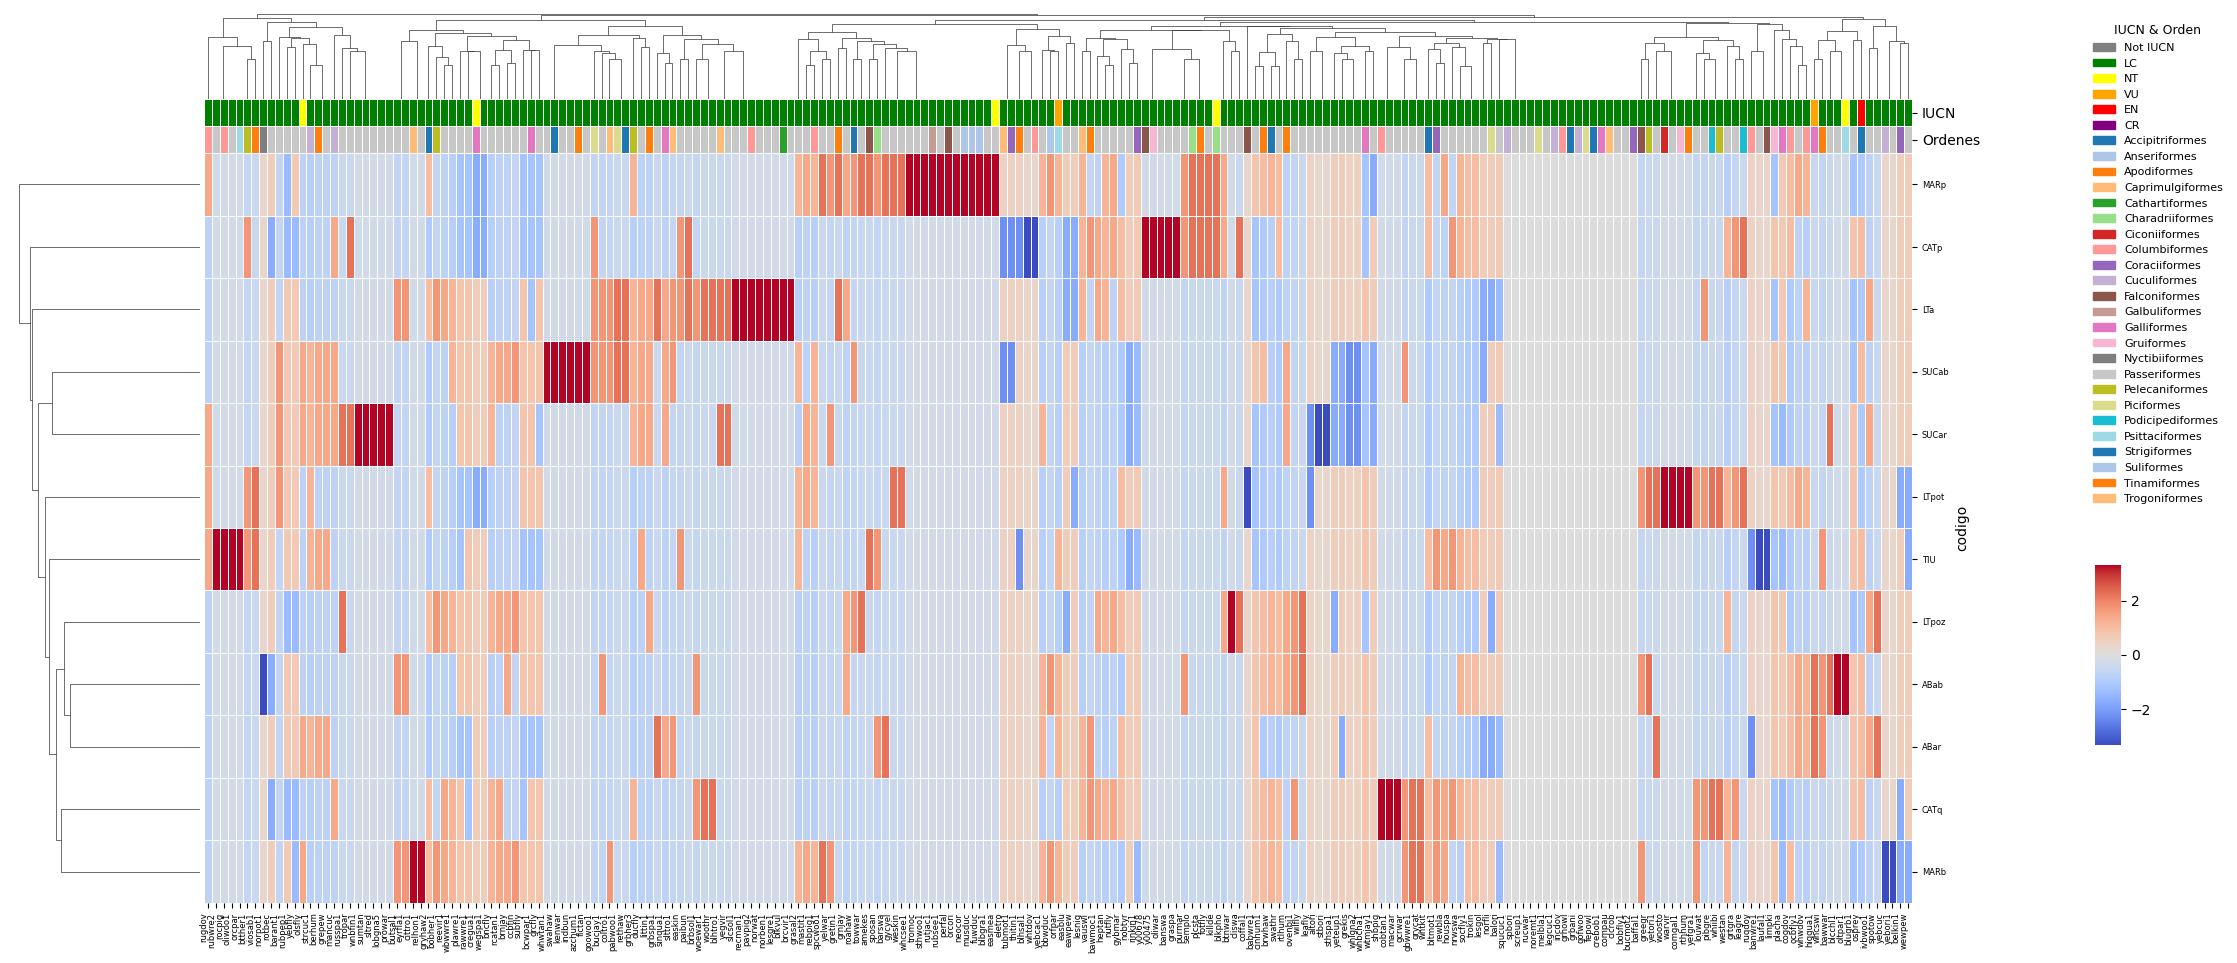

In [896]:
import matplotlib.patches as mpatches

iucn_colors = iucn_status.map(iucn_palette).to_frame("IUCN")

# 1. Configuración del clustermap
plt.figure(figsize=(20, 10))  # Ajusta según el número de especies

# 2. Clustermap con UPGMA (method='average')
col_colors_combined = pd.concat([iucn_colors, order_colors], axis=1)
g = sns.clustermap(
    species_data4_log,
    method='average',          # UPGMA
    metric='euclidean',       # Métrico para distancias (alternativas: 'euclidean', 'jaccard', 'braycurtis')
    cmap='coolwarm',            # Paleta de colores (mejor contraste que 'coolwarm')
    col_colors = col_colors_combined,   # Barra de colores para especies
    figsize=(20, 10),          # Tamaño ajustable
    dendrogram_ratio=(0.1, 0.1),  # Espacio para dendrogramas
    cbar_pos=(1.05, 0.25, 0.013, 0.18),  # Posición de la barra de color (x0, y0, width, height)
    yticklabels=True,          # Mostrar todas las etiquetas de filas
    xticklabels=True,          # Mostrar todas las etiquetas de columnas
    tree_kws={'linewidths': 0.5},  # Grosor de líneas del dendrograma
    linewidths=0.5,      # Grosor de las líneas
    linecolor='white', 
)

# 3. Ajustar etiquetas (rotación y tamaño)
plt.setp(g.ax_heatmap.get_xticklabels(), 
         rotation=90, 
         fontsize=6,           # Reducir tamaño para evitar solapamiento
         ha='right')           # Alinear a la derecha

plt.setp(g.ax_heatmap.get_yticklabels(), 
         rotation=0, 
         fontsize=6)

# 1. Definir los parches para cada categoría

# Leyenda IUCN
legend_patches_iucn = [
    mpatches.Patch(color='gray', label='Not IUCN'),
    mpatches.Patch(color='green', label='LC'),
    mpatches.Patch(color='yellow', label='NT'),
    mpatches.Patch(color='orange', label='VU'),
    mpatches.Patch(color='red', label='EN'),
    mpatches.Patch(color='purple', label='CR')
]

# Leyenda Orders usando tu diccionario
order_palette_rgb = {
    'Accipitriformes': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
    'Anseriformes': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
    'Apodiformes': (1.0, 0.4980392156862745, 0.054901960784313725),
    'Caprimulgiformes': (1.0, 0.7333333333333333, 0.47058823529411764),
    'Cathartiformes': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
    'Charadriiformes': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
    'Ciconiiformes': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
    'Columbiformes': (1.0, 0.596078431372549, 0.5882352941176471),
    'Coraciiformes': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
    'Cuculiformes': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
    'Falconiformes': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
    'Galbuliformes': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
    'Galliformes': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
    'Gruiformes': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
    'Nyctibiiformes': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
    'Passeriformes': (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
    'Pelecaniformes': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
    'Piciformes': (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
    'Podicipediformes': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
    'Psittaciformes': (0.6196078431372549, 0.8549019607843137, 0.8980392156862745),
    'Strigiformes': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
    'Suliformes': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
    'Tinamiformes': (1.0, 0.4980392156862745, 0.054901960784313725),
    'Trogoniformes': (1.0, 0.7333333333333333, 0.47058823529411764),
    None: (0.5, 0.5, 0.5)
}

legend_patches_order = [mpatches.Patch(color=color, label=order) 
                        for order, color in order_palette_rgb.items() if order is not None]

# Unir ambas leyendas
g.ax_col_dendrogram.legend(
    handles=legend_patches_iucn + legend_patches_order,
    title="IUCN & Orden",
    loc='center left',
    bbox_to_anchor=(1.1, -1.85),
    frameon=False,
    fontsize=8,
    title_fontsize=9
)



# 4. Guardar en SVG (vectorial) y PNG
os.makedirs("images", exist_ok=True)
g.savefig(
    "images/heatmap-upgma-riqueza-log.svg", 
    format='svg', 
    dpi=300, 
    bbox_inches='tight'
)

plt.show()
plt.close()


### CCA

In [54]:
matriz_abundancia = df_tidy.pivot(
    index='group_key',          # Filas: grupos/sitios
    columns='scientific name',  # Columnas: especies
    values='abundance'          # Valores: abundancias
).fillna(0)                     # Rellenar NaN con 0

# Eliminar nombres de ejes
matriz_abundancia.columns.name = None  # Elimina "scientific name" (columnas)
matriz_abundancia.index.name = None    # Elimina "group_key" (filas)

# Resultado limpio
matriz_abundancia

acowoo  altori  banwre1  barant1  bawmoc1  bkfant2  blhsal1  \
quebracho2_sem21      44       3      106        7       50        2     2128   
quebracho3_sem21      44       3      104        7       46        2     1961   
quebracho_sem21       44       3      110        7       50        2     2200   

                  blhtro1  bltjay1  bobfly1  ...  tubmot1  viosab1  wemcha1  \
quebracho2_sem21        7        1      229  ...       12        2        1   
quebracho3_sem21        8        1      207  ...        5        2        1   
quebracho_sem21         8        1      235  ...       12        2        1   

                  whcman1  whtdov  whtrob1  yebori1  yegvir  yetori1  yewtan1  
quebracho2_sem21        8       4       16       75       7        2        1  
quebracho3_sem21        8       4       14       69       6        2        0  
quebracho_sem21         9       4       17       75       7        2        1  

[3 rows x 84 columns]

In [55]:
# Example data (replace with your dataset)
# Example data
# Tipo de cobertura, habitat, cercania a cuerpos de agua, altitud, parcelas[riqueza, especies, dap, altura, cobertura]

env_data = pd.DataFrame({  # Environmental variables (samples x env)
    "pH": [2.0, 7.2, 9.1],
    "Temp": [1, 5, 25],
    "Alt": [1000, 2000, 2500],
}, index=matriz_abundancia.index)

In [56]:
from skbio.stats.ordination import cca



skbio.stats.ordination.cca(y, 
                           x, 
                           scaling=1, 
                           sample_ids=None, 
                           feature_ids=None, 
                           constraint_ids=None, 
                           output_format=None)


In [57]:
# Run CCA
cca_result = cca(
    y=matriz_abundancia,  # Species abundance matrix
    x=env_data,      # Environmental variables
    scaling=1        # Scaling type (1 focuses on species distances)
)

# Extract results
sample_scores = cca_result.samples  # Site scores in CCA space
species_scores = cca_result.features  # Species scores
env_scores = cca_result.biplot_scores  # Environmental variable arrows

print("Sample Scores (CCA):\n", sample_scores)
print("\nSpecies Scores:\n", species_scores)
print("\nEnvironmental Vectors:\n", env_scores)


Sample Scores (CCA):
                       CCA1      CCA2          CCA3          CCA4          CCA5
quebracho2_sem21 -0.027102 -0.014546 -4.044321e-16 -8.769115e-18 -1.755101e-17
quebracho3_sem21  0.071026  0.001479 -3.983700e-16 -4.563875e-17  1.160816e-17
quebracho_sem21  -0.037342  0.012649 -4.031971e-16  4.867791e-17  6.673736e-18

Species Scores:
               CCA1      CCA2      CCA3      CCA4      CCA5
acowoo    0.948209 -1.087234 -0.791634  0.708898 -0.344001
altori    0.948209 -1.087234 -0.823160  1.698597  2.294230
banwre1   0.548723  0.082498 -0.811275  0.247935 -0.565579
barant1   0.948209 -1.087234 -1.091726  0.895575  1.765966
bawmoc1   0.133240 -1.433646 -0.770450 -0.025631  0.228618
...            ...       ...       ...       ...       ...
whtrob1  -0.681120  0.500267 -1.044786 -0.916911 -0.670444
yebori1   0.133240 -1.433646 -0.451369  0.160170  0.517557
yegvir   -0.539110 -1.719435 -0.755429 -0.187083 -0.359366
yetori1   0.948209 -1.087234 -1.085315  0.841496 -0.53

In [58]:
# Convert env_scores to NumPy array if it's a DataFrame
env_scores_array = env_scores.values if hasattr(env_scores, 'values') else env_scores



In [59]:
#print("Number of CCA axes:", cca_result.scores.shape[1])
print("Number of CCA axes:", cca_result.features.shape[1])  # Species x CCA-axes
print("Number of CCA axes:", cca_result.biplot_scores.shape[1])  # Env-vars x CCA-axes

Number of CCA axes: 5
Number of CCA axes: 2


/tmp/ipykernel_36510/3539053207.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlabel(f"CCA1 ({cca_result.proportion_explained[0] * 100:.1f}%)")
/tmp/ipykernel_36510/3539053207.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.ylabel(f"CCA2 ({cca_result.proportion_explained[1] * 100:.1f}%)")


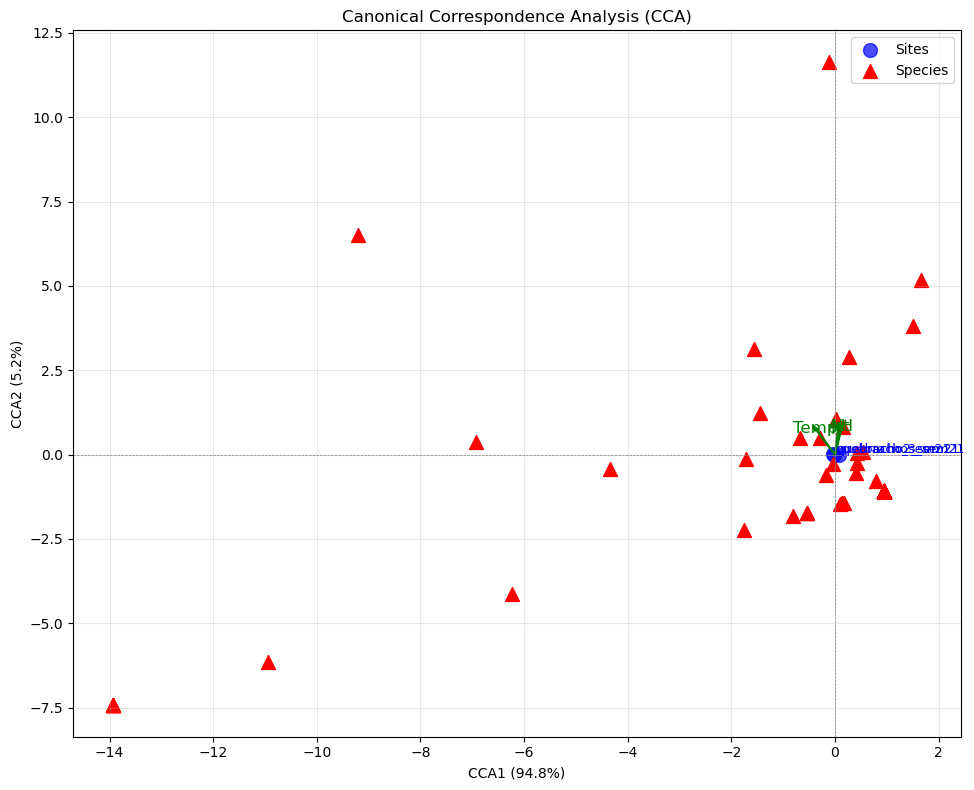

In [60]:
# Create the plot
plt.figure(figsize=(10, 8))

# Plot site scores (samples)
plt.scatter(
    sample_scores["CCA1"],
    sample_scores["CCA2"],
    color="blue",
    label="Sites",
    s=100,
    alpha=0.7
)

# Plot species scores
plt.scatter(
    species_scores["CCA1"],
    species_scores["CCA2"],
    color="red",
    label="Species",
    marker="^",
    s=100
)

# Plot environmental variable arrows (corrected indexing)
for i, var in enumerate(env_data.columns):
    plt.arrow(
        0, 0,
        env_scores_array[i, 0] * 0.8,  # Use env_scores_array instead
        env_scores_array[i, 1] * 0.8,
        color="green",
        width=0.02,
        head_width=0.1,
    )
    plt.text(
        env_scores_array[i, 0] * 0.85,
        env_scores_array[i, 1] * 0.85,
        var,
        color="green",
        fontsize=12,
        ha="center",
        va="center",
    )

# Add labels and legend
plt.xlabel(f"CCA1 ({cca_result.proportion_explained[0] * 100:.1f}%)")
plt.ylabel(f"CCA2 ({cca_result.proportion_explained[1] * 100:.1f}%)")
plt.title("Canonical Correspondence Analysis (CCA)")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.5)
plt.grid(alpha=0.3)
plt.legend()

# Add site labels (optional)
for site in sample_scores.index:
    plt.text(
        sample_scores.loc[site, "CCA1"] + 0.05,
        sample_scores.loc[site, "CCA2"] + 0.05,
        site,
        fontsize=9,
        color="blue",
    )

plt.tight_layout()

# Create the filename using the group_key pattern
filename = f"images/cca.svg"
    
# Ensure the directory exists
os.makedirs("images", exist_ok=True)
    
# Save the figure
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

### RDA

In [61]:
from skbio.stats.ordination import pcoa
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa_biplot

# PCoA
pcoa(distance_matrix, 
                            method='eigh', 
                            number_of_dimensions=0, 
                            inplace=False, 
                            seed=None, 
                            warn_neg_eigval=0.01, 
                            output_format=None)

In [62]:
# Compute Bray-Curtis distance matrix
distance_matrix = beta_diversity("braycurtis", matriz_abundancia)


In [63]:
pcoa_results = pcoa(
    distance_matrix,              # Your distance matrix
    method='eigh',                # Default: eigenvalue decomposition
    number_of_dimensions=0,       # 0 = keep all dimensions
    inplace=False,                # Do not modify input matrix
    seed=None,                    # Random seed (for reproducibility)
    warn_neg_eigval=0.01          # Return OrdinationResults object
)

In [64]:
# Coordenadas de las muestras en los ejes PCoA (DataFrame)
samples = pcoa_results.samples  # Columnas: 'PC1', 'PC2', etc.

# Valores propios (eigenvalues) y varianza explicada
eigenvalues = pcoa_results.eigvals          # Array de eigenvalues
variance_explained = pcoa_results.proportion_explained  # Varianza explicada por cada eje (ej: [0.5, 0.3, ...])

print("Coordenadas de las muestras:")
print(samples.head())
print("\nVarianza explicada por cada eje:", variance_explained)

Coordenadas de las muestras:
                       PC1       PC2  PC3
quebracho2_sem21  0.005913  0.003004  0.0
quebracho3_sem21 -0.031441 -0.001034  0.0
quebracho_sem21   0.025528 -0.001970  0.0

Varianza explicada por cada eje: PC1    0.991729
PC2    0.008271
PC3    0.000000
dtype: float64


/tmp/ipykernel_36510/3528152594.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(samples['PC1'][i], samples['PC2'][i], sample, fontsize=9)
/tmp/ipykernel_36510/3528152594.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlabel(f"PC1 ({variance_explained[0]*100:.1f}%)")  # % varianza explicada
/tmp/ipykernel_36510/3528152594.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.ylabel(f"PC2 ({variance_explaine

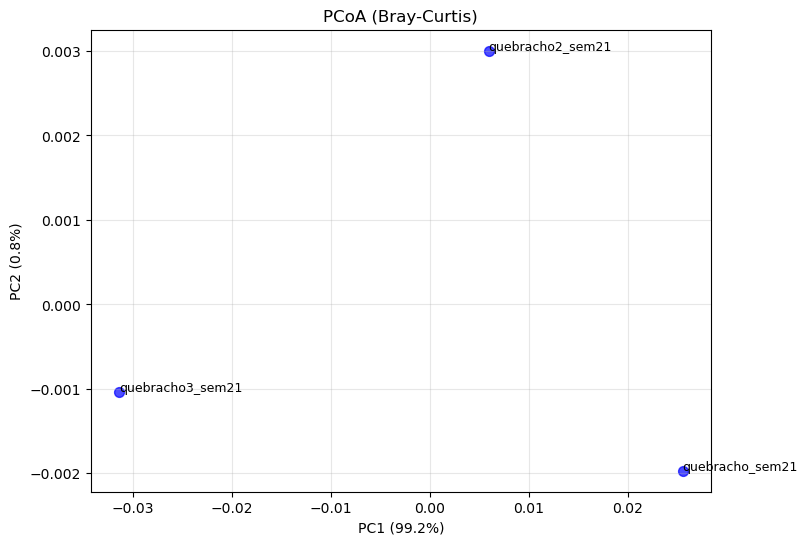

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(
    samples['PC1'],
    samples['PC2'],
    c='blue',                # Color de puntos
    s=50,                    # Tamaño de puntos
    alpha=0.7
)

# Etiquetar puntos (opcional)
for i, sample in enumerate(samples.index):
    plt.text(samples['PC1'][i], samples['PC2'][i], sample, fontsize=9)

plt.xlabel(f"PC1 ({variance_explained[0]*100:.1f}%)")  # % varianza explicada
plt.ylabel(f"PC2 ({variance_explained[1]*100:.1f}%)")
plt.title("PCoA (Bray-Curtis)")
plt.grid(alpha=0.3)
plt.show()

In [66]:
biplot_results = pcoa_biplot(pcoa_results, matriz_abundancia)

In [67]:
# Coordenadas de las muestras (ya las tienes en pcoa_results.samples)
samples = pcoa_results.samples[['PC1', 'PC2']]

# Coordenadas de las especies (features)
species = biplot_results.features[['PC1', 'PC2']]
species_coords = biplot_results.features[['PC1', 'PC2']]

/tmp/ipykernel_36510/2039328412.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlabel(f"PCoA1 ({pcoa_results.proportion_explained[0]*100:.1f}%)")
/tmp/ipykernel_36510/2039328412.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.ylabel(f"PCoA2 ({pcoa_results.proportion_explained[1]*100:.1f}%)")


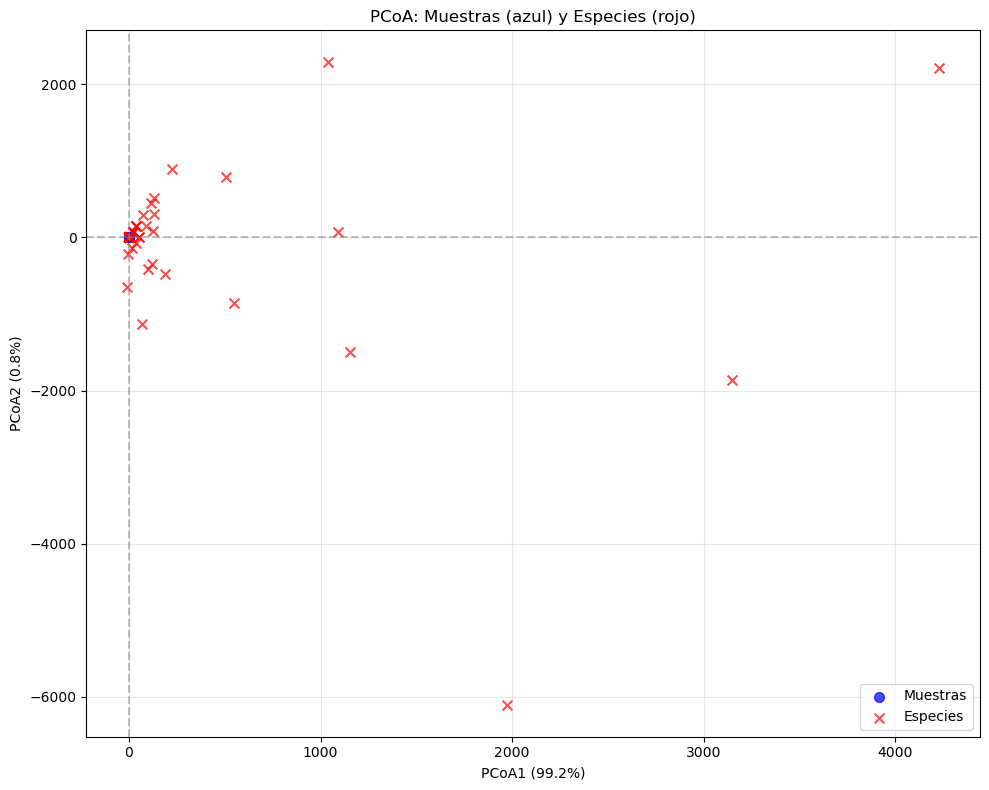

In [68]:
plt.figure(figsize=(10, 8))

# Muestras (puntos azules)
plt.scatter(
    pcoa_results.samples['PC1'],
    pcoa_results.samples['PC2'],
    c='blue',
    label='Muestras',
    alpha=0.7,
    s=50  # Tamaño de puntos
)

# Especies (puntos rojos)
plt.scatter(
    species_coords['PC1'],
    species_coords['PC2'],
    c='red',
    label='Especies',
    alpha=0.7,
    s=50,
    marker='x'  # Opcional: Usar 'x' en lugar de puntos
)

# Añadir líneas de referencia y estilo
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel(f"PCoA1 ({pcoa_results.proportion_explained[0]*100:.1f}%)")
plt.ylabel(f"PCoA2 ({pcoa_results.proportion_explained[1]*100:.1f}%)")
plt.title("PCoA: Muestras (azul) y Especies (rojo)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()